In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
df_hr_disease_original = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\kaggle data\\heart disease\\Heart_Disease_Prediction.csv')

In [3]:
df_hr_disease = df_hr_disease_original.copy()

Data Exploration

In [4]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
print(list(df_hr_disease.columns))

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [6]:
df_hr_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df_hr_disease['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [8]:
df_hr_disease_target = df_hr_disease['Heart Disease']

C:\Users\20181588\AppData\Local\Temp\ipykernel_4164\1229538069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")


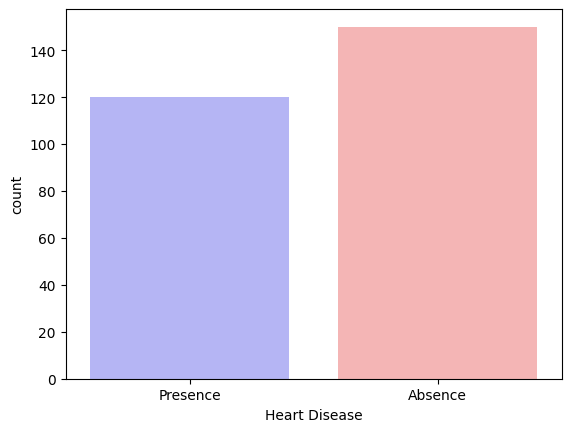

In [9]:
sns.countplot(x="Heart Disease", data=df_hr_disease, palette="bwr")
plt.show()

In [10]:
percentage_presence = (df_hr_disease['Heart Disease'] == 'Presence').mean() * 100
percentage_absence = (df_hr_disease['Heart Disease'] == 'Absence').mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")



Percentage of patients with heart disease: 44.44%
Percentage of patients without heart disease: 55.56%


C:\Users\20181588\AppData\Local\Temp\ipykernel_4164\1682686428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")


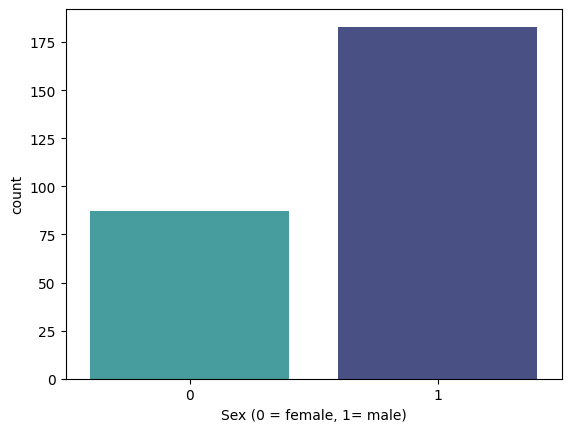

In [11]:
sns.countplot(x='Sex', data=df_hr_disease, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()


In [12]:
countFemale = len(df_hr_disease[df_hr_disease.Sex == 0])
countMale = len(df_hr_disease[df_hr_disease.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df_hr_disease.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df_hr_disease.Sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [13]:
df_hr_disease.groupby('Heart Disease').mean()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,52.706667,0.553333,2.820000,128.866667,244.213333,0.153333,0.860,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667
Presence,56.591667,0.833333,3.616667,134.441667,256.466667,0.141667,1.225,138.858333,0.550000,1.584167,1.816667,1.150000,5.833333


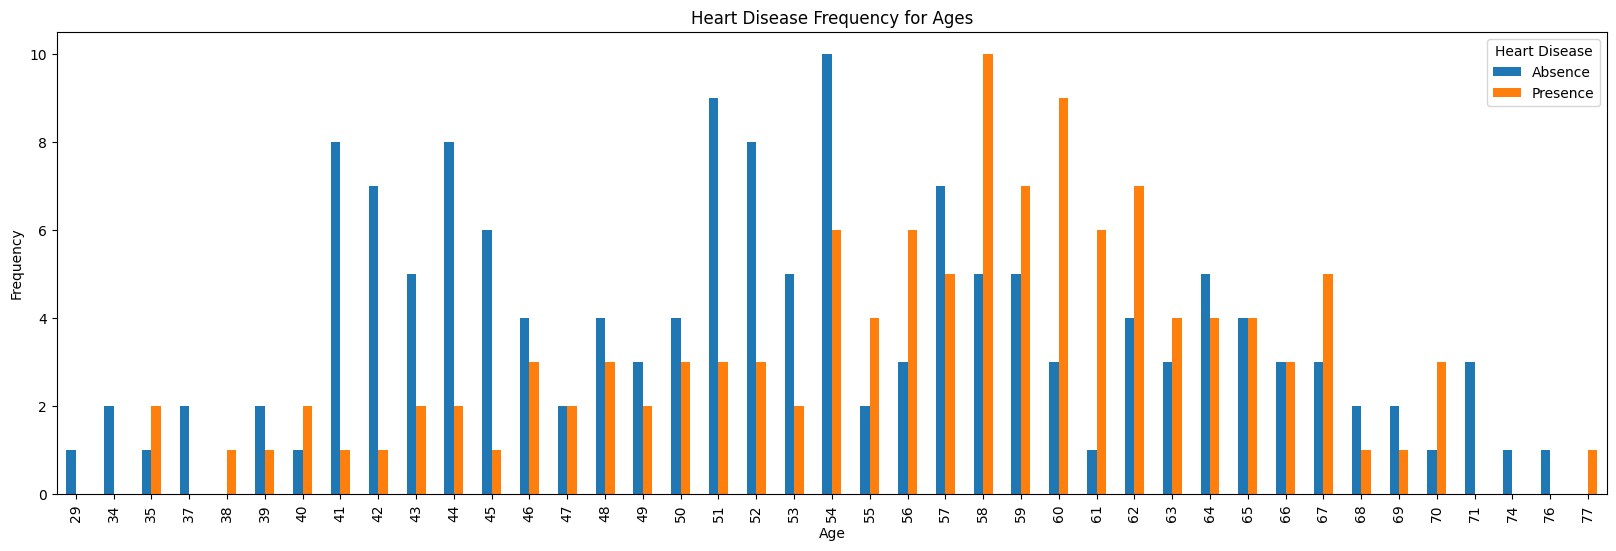

In [14]:
pd.crosstab(df_hr_disease['Age'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

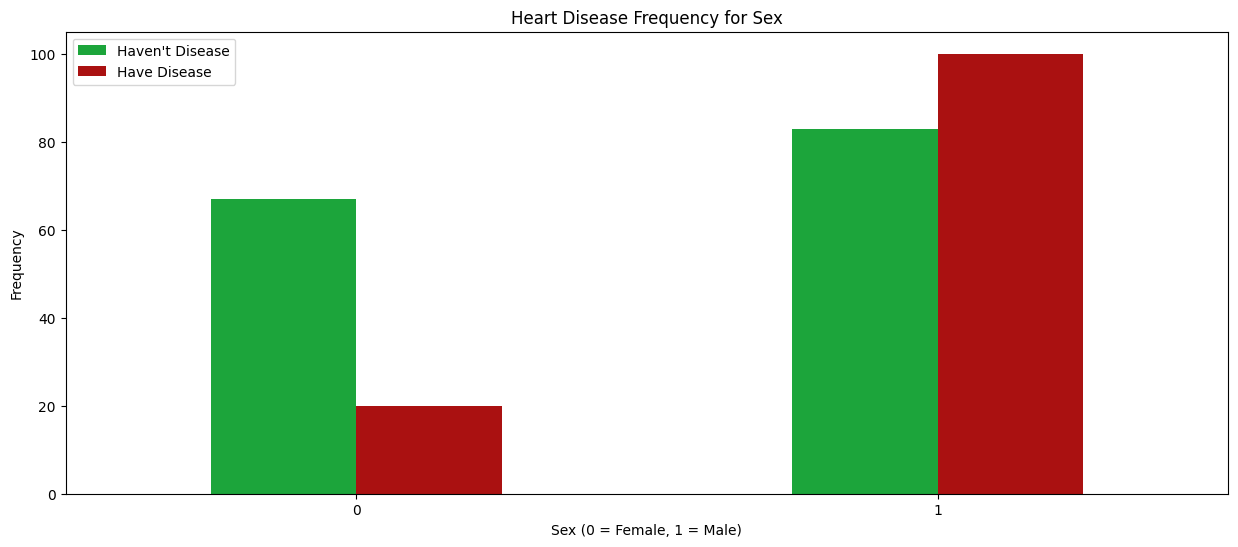

In [15]:
pd.crosstab(df_hr_disease['Sex'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

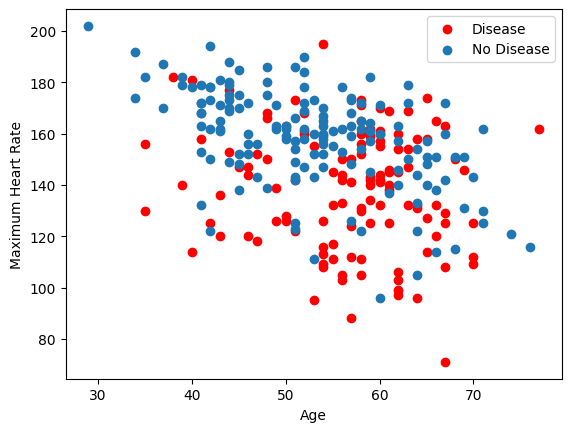

In [16]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Presence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Presence'], c="red")
plt.scatter(x=df_hr_disease.Age[df_hr_disease['Heart Disease']=='Absence'], 
            y=df_hr_disease['Max HR'][df_hr_disease['Heart Disease']=='Absence'])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


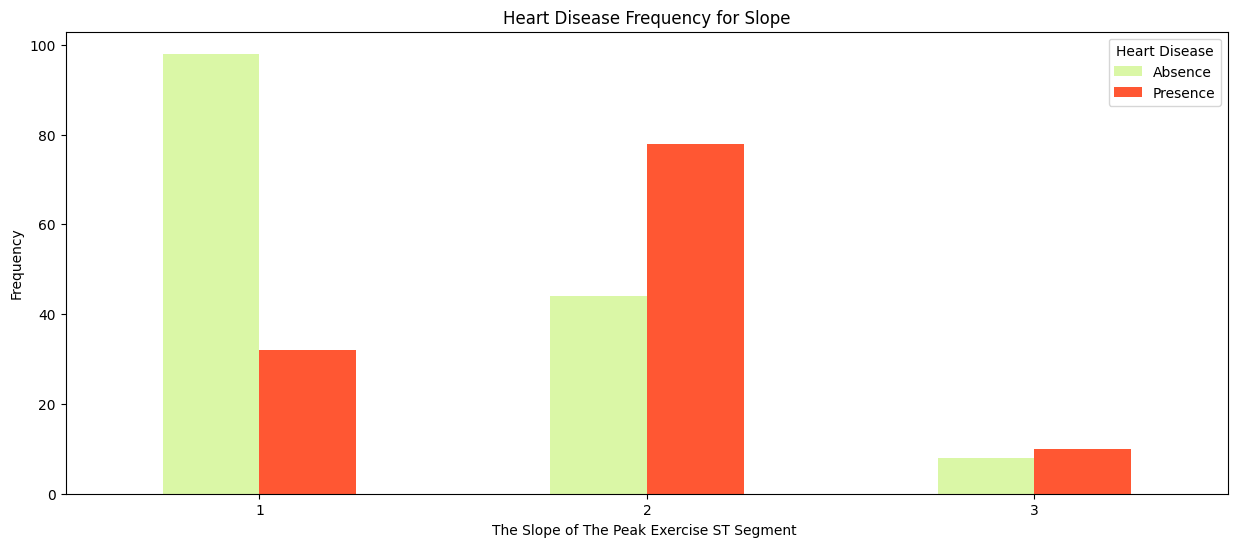

In [17]:
pd.crosstab(df_hr_disease['Slope of ST'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

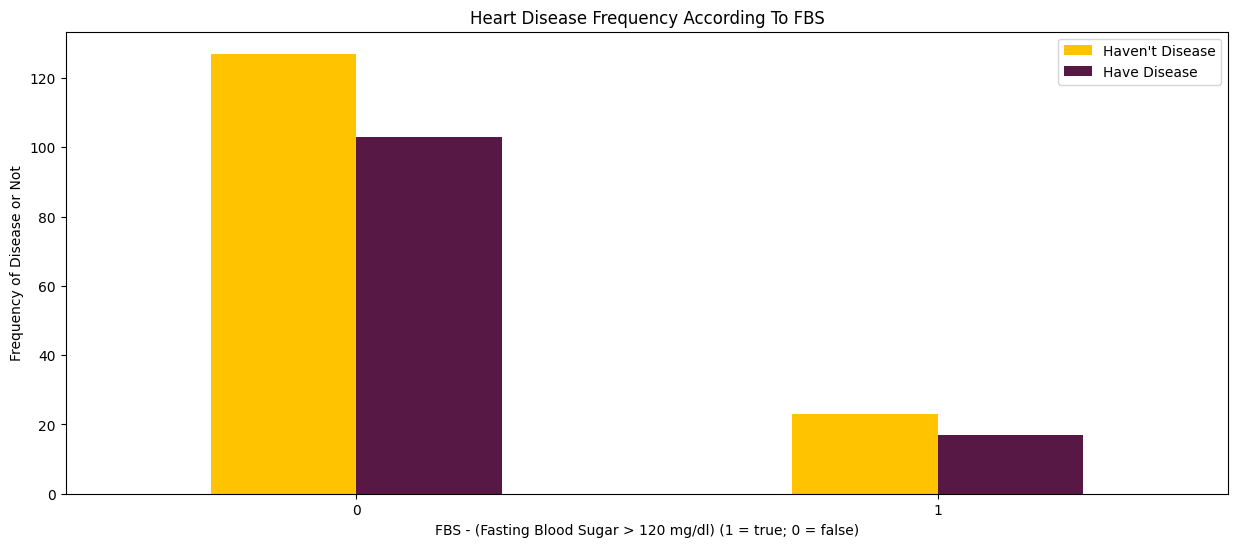

In [18]:
pd.crosstab(df_hr_disease['FBS over 120'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

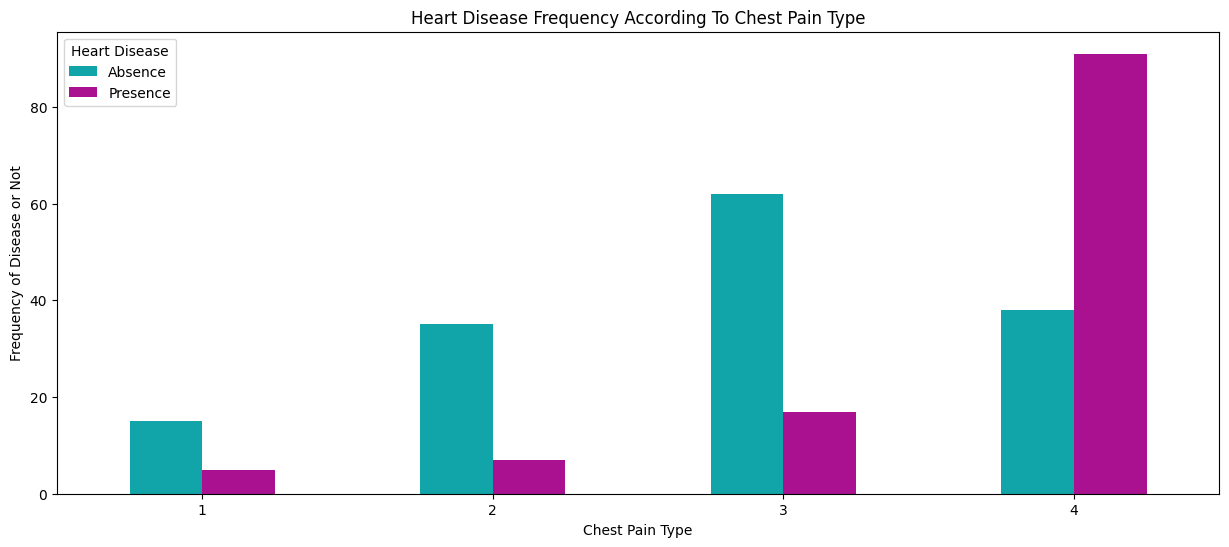

In [19]:
pd.crosstab(df_hr_disease['Chest pain type'],df_hr_disease['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
# Assuming df_hr_disease is your DataFrame with the heart disease data
# And 'Heart Disease' is the column with values 'Presence' or 'Absence'

# Map 'Presence' to 1 and 'Absence' to 0
df_hr_disease['Heart Disease'] = df_hr_disease['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Now the 'Heart Disease' column will have binary values 1 or 0

In [21]:
df_hr_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [22]:
# Creating dummy variables for the categorical columns
a = pd.get_dummies(df_hr_disease['Chest pain type'], prefix="cp").astype(int)
b = pd.get_dummies(df_hr_disease['Thallium'], prefix="thal").astype(int)
c = pd.get_dummies(df_hr_disease['Slope of ST'], prefix="slope").astype(int)

# Concatenating the dummy variables with the original dataframe
frames = [df_hr_disease, a, b, c]
df_hr_disease = pd.concat(frames, axis=1)

# Display the first few rows of the updated dataframe
df_hr_disease.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,0,1,0,0,0,1,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,...,0,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,0,1,0,0,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,0,0,1,0,0,1,0,0


In [23]:
# Drop the original categorical columns after creating dummy variables
df_hr_disease = df_hr_disease.drop(columns=['Chest pain type', 'Thallium', 'Slope of ST'])

# Display the first few rows of the updated dataframe
df_hr_disease.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,1,0,0,0,1,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,1,0,1,0
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,0,0,1,1,0,0
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,0,1,0,1,0
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0


Machine Learning Algorithms

Logistic Regression

In [24]:
y = df_hr_disease['Heart Disease'].values
x_data = df_hr_disease.drop(['Heart Disease'], axis = 1)

In [25]:
y.shape

(270,)

In [26]:
x_data.shape

(270, 20)

In [27]:
import numpy as np

# Assuming x_data is your features DataFrame without the 'Heart Disease' column
# Normalize each column in the DataFrame
X = (x_data - x_data.min()) / (x_data.max() - x_data.min())

# Now X is a DataFrame with normalized values


In [28]:
X.shape

(270, 20)

In [29]:
# Assuming X and y are your complete dataset and labels respectively.
# First, ensure that X and y have the same length
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Ensure that the number of features and labels match
assert X.shape[0] == y.shape[0], "Mismatch in number of samples between X and y!"


Features shape: (270, 20)
Labels shape: (270,)


In [30]:
#print(y)
#print(X)

In [31]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create the classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Naive Bayes': gnb
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_test)
            auc = roc_auc_score(y_test, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}\n")


Results for Logistic Regression:
Accuracy: 0.8407, AUC: 0.9036, Sensitivity: 0.8083, Specificity: 0.8667

Results for SVM:
Accuracy: 0.8037, AUC: 0.8919, Sensitivity: 0.7500, Specificity: 0.8467

Results for Decision Tree:
Accuracy: 0.7111, AUC: 0.7083, Sensitivity: 0.6833, Specificity: 0.7333

Results for KNN:
Accuracy: 0.8185, AUC: 0.8610, Sensitivity: 0.8083, Specificity: 0.8267

Results for Random Forest:
Accuracy: 0.8148, AUC: 0.8839, Sensitivity: 0.7500, Specificity: 0.8667

Results for XGBoost:


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

Accuracy: 0.7963, AUC: 0.8558, Sensitivity: 0.7417, Specificity: 0.8400

Results for Naive Bayes:
Accuracy: 0.8333, AUC: 0.8842, Sensitivity: 0.8083, Specificity: 0.8533



In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings

# This dictionary will hold the ROC curve data
roc_data = {}

# Perform 5-fold cross-validation for each classifier and store ROC data
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test)[:, 1]
        else:  # Use decision function if predict_proba is not available
            y_pred_proba = clf.decision_function(X_test)
            # Normalize decision function to 0-1
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        
        # Calculate false positives and true positives
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    # Store the mean and the area under the curve for later plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    roc_data[name] = {
        'mean_fpr': mean_fpr,
        'mean_tpr': mean_tpr,
        'mean_auc': mean_auc,
        'std_auc': std_auc
    }
    
# Now roc_data contains the average ROC data for each classifier


c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\20181588\Desktop\code\phd\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

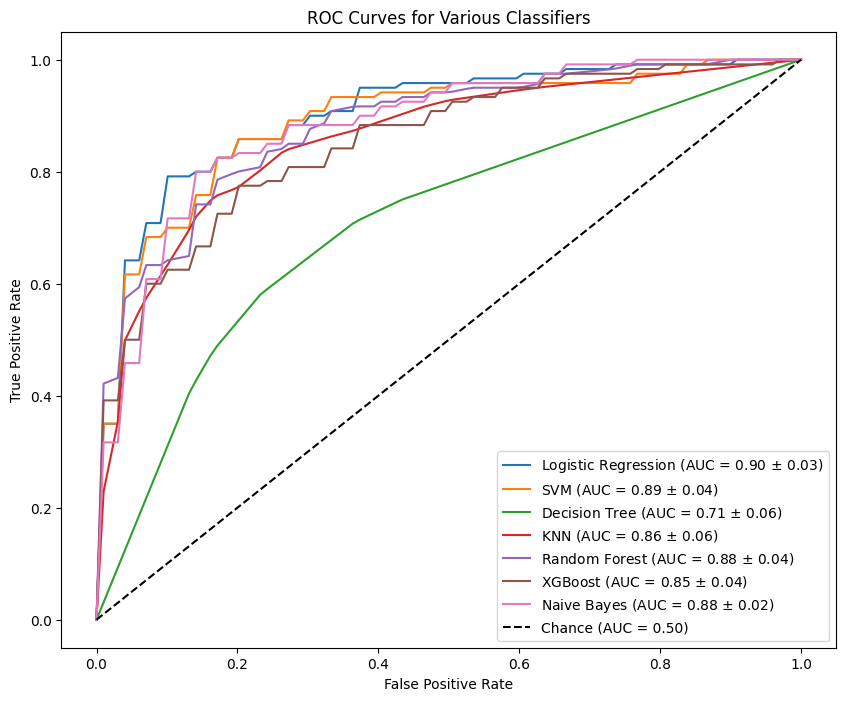

In [33]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name in roc_data:
    data = roc_data[name]
    plt.plot(data['mean_fpr'], data['mean_tpr'], label=f"{name} (AUC = {data['mean_auc']:.2f} $\pm$ {data['std_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classifiers')
plt.legend(loc='lower right')
plt.show()


In [34]:
"""
from sklearn.metrics import confusion_matrix
import numpy as np

# This dictionary will hold the confusion matrix data
conf_matrix_data = {}

# Perform 5-fold cross-validation for each classifier and store confusion matrix data
for name, clf in classifiers.items():
    cms = []  # Store confusion matrices for each fold

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate confusion matrix and normalize it
        cm = confusion_matrix(y_test, y_pred, normalize='true')
        cms.append(cm)

    # Calculate mean confusion matrix
    mean_cm = np.mean(cms, axis=0)
    conf_matrix_data[name] = mean_cm

# Now conf_matrix_data contains the average normalized confusion matrix for each classifier
"""


"\nfrom sklearn.metrics import confusion_matrix\nimport numpy as np\n\n# This dictionary will hold the confusion matrix data\nconf_matrix_data = {}\n\n# Perform 5-fold cross-validation for each classifier and store confusion matrix data\nfor name, clf in classifiers.items():\n    cms = []  # Store confusion matrices for each fold\n\n    for train_index, test_index in cv.split(X, y):\n        X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n        y_train, y_test = y[train_index], y[test_index]\n        \n        clf.fit(X_train, y_train)\n        y_pred = clf.predict(X_test)\n        \n        # Calculate confusion matrix and normalize it\n        cm = confusion_matrix(y_test, y_pred, normalize='true')\n        cms.append(cm)\n\n    # Calculate mean confusion matrix\n    mean_cm = np.mean(cms, axis=0)\n    conf_matrix_data[name] = mean_cm\n\n# Now conf_matrix_data contains the average normalized confusion matrix for each classifier\n"

In [35]:
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False)
    plt.title(f'Normalized Confusion Matrix: {classifier_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot the confusion matrices for each classifier
for name in conf_matrix_data:
    plot_confusion_matrix(conf_matrix_data[name], name)
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Function to plot a confusion matrix\ndef plot_confusion_matrix(cm, classifier_name):\n    plt.figure(figsize=(8, 6))\n    sns.heatmap(cm, annot=True, fmt=".2f", cmap=\'Blues\', cbar=False)\n    plt.title(f\'Normalized Confusion Matrix: {classifier_name}\')\n    plt.ylabel(\'True Label\')\n    plt.xlabel(\'Predicted Label\')\n    plt.show()\n\n# Plot the confusion matrices for each classifier\nfor name in conf_matrix_data:\n    plot_confusion_matrix(conf_matrix_data[name], name)\n'

results per gender

In [36]:
import warnings
import numpy as np
import pandas as pd  # Assuming you're using pandas for your data manipulation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from xgboost import XGBClassifier

# To prevent unnecessary warnings from being displayed
warnings.filterwarnings('ignore')

# Assuming your dataset is loaded into a pandas DataFrame and split into features X and labels y
# X, y = ...

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()

# Uncomment the following line if you have XGBoost installed and want to include it
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    'XGBoost': xgb,  # Uncomment this line if including XGBoost
    'Naive Bayes': gnb
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store overall metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    # Lists to store gender-specific metrics for each fold
    gender_scores = {
        'Male': {'Accuracy': [], 'AUC': [], 'Sensitivity': [], 'Specificity': []},
        'Female': {'Accuracy': [], 'AUC': [], 'Sensitivity': [], 'Specificity': []}
    }
    
    for train_index, test_index in cv.split(X, y):
        # Split the dataset into the training set and the test set
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Remove the 'Sex' column from the training set
        X_train = X_train.drop(columns=['Sex'])
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test.drop(columns=['Sex']))[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_test.drop(columns=['Sex']))
            auc = roc_auc_score(y_test, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_test.drop(columns=['Sex']))
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
        
        # Split the test set by gender
        X_test_male = X_test[X_test['Sex'] == 1]
        y_test_male = y_test[X_test['Sex'] == 1]
        X_test_female = X_test[X_test['Sex'] == 0]
        y_test_female = y_test[X_test['Sex'] == 0]
        
        # Make predictions for each gender
        y_pred_male = clf.predict(X_test_male.drop(columns=['Sex']))
        y_pred_female = clf.predict(X_test_female.drop(columns=['Sex']))
        
        # Calculate and store gender-specific metrics
        for gender, X_gender, y_gender, y_pred_gender in zip(['Male', 'Female'], [X_test_male, X_test_female], [y_test_male, y_test_female], [y_pred_male, y_pred_female]):
            gender_scores[gender]['Accuracy'].append(accuracy_score(y_gender, y_pred_gender))
            
            if hasattr(clf, "predict_proba"):
                y_pred_proba_gender = clf.predict_proba(X_gender.drop(columns=['Sex']))[:, 1]
                gender_scores[gender]['AUC'].append(roc_auc_score(y_gender, y_pred_proba_gender))
            else:
                y_pred_proba_gender = clf.predict(X_gender.drop(columns=['Sex']))
                gender_scores[gender]['AUC'].append(roc_auc_score(y_gender, y_pred_proba_gender))
            
            gender_scores[gender]['Sensitivity'].append(recall_score(y_gender, y_pred_gender))
            
            tn_gender, fp_gender, fn_gender, tp_gender = confusion_matrix(y_gender, y_pred_gender).ravel()
            gender_scores[gender]['Specificity'].append(tn_gender / (tn_gender + fp_gender))
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Overall - Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}")
    
    # Calculate mean metrics for each gender and print
    for gender in ['Male', 'Female']:
        mean_accuracy_gender = np.mean(gender_scores[gender]['Accuracy'])
        mean_auc_gender = np.mean(gender_scores[gender]['AUC'])
        mean_sensitivity_gender = np.mean(gender_scores[gender]['Sensitivity'])
        mean_specificity_gender = np.mean(gender_scores[gender]['Specificity'])
        
        print(f"{gender} - Accuracy: {mean_accuracy_gender:.4f}, AUC: {mean_auc_gender:.4f}, Sensitivity: {mean_sensitivity_gender:.4f}, Specificity: {mean_specificity_gender:.4f}")


Results for Logistic Regression:
Overall - Accuracy: 0.8407, AUC: 0.8947, Sensitivity: 0.8167, Specificity: 0.8600
Male - Accuracy: 0.8169, AUC: 0.8670, Sensitivity: 0.8211, Specificity: 0.8105
Female - Accuracy: 0.9062, AUC: 0.9448, Sensitivity: 0.8200, Specificity: 0.9361
Results for SVM:
Overall - Accuracy: 0.8259, AUC: 0.8892, Sensitivity: 0.7917, Specificity: 0.8533
Male - Accuracy: 0.7887, AUC: 0.8536, Sensitivity: 0.7816, Specificity: 0.7931
Female - Accuracy: 0.9216, AUC: 0.9570, Sensitivity: 0.8867, Specificity: 0.9361
Results for Decision Tree:
Overall - Accuracy: 0.7222, AUC: 0.7183, Sensitivity: 0.6833, Specificity: 0.7533
Male - Accuracy: 0.7122, AUC: 0.7156, Sensitivity: 0.6709, Specificity: 0.7603
Female - Accuracy: 0.7273, AUC: 0.7408, Sensitivity: 0.7433, Specificity: 0.7383
Results for KNN:
Overall - Accuracy: 0.8148, AUC: 0.8282, Sensitivity: 0.7833, Specificity: 0.8400
Male - Accuracy: 0.7793, AUC: 0.8058, Sensitivity: 0.7824, Specificity: 0.7770
Female - Accuracy: 

sdg - getting more data

SDV CTGAN 

In [37]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
ctgan = CTGANSynthesizer(metadata=metadata, epochs=10, verbose=True)

# Fit the CTGAN model to your data
ctgan.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_ctgan = ctgan.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_ctgan.head())

Gen. (0.63) | Discrim. (-0.25): 100%|██████████| 10/10 [00:00<00:00, 19.96it/s]


   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   71    1  157          311             0            1     196   
1   77    0  113          336             0            0     202   
2   42    0  147          329             1            2     119   
3   47    0  110          313             1            2     150   
4   56    0  166          271             0            2     190   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            0.1                        0  ...     0     0   
1                0            0.6                        1  ...     1     0   
2                1            0.0                        0  ...     0     1   
3                0            2.3                        3  ...     1     0   
4                0            1.5                        2  ...     0     1   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     1     0       1       0       0        1   

In [38]:
ctgan.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,tensor(0.7956),tensor(-0.0104)
1,1,tensor(0.7372),tensor(-0.0063)
2,2,tensor(0.7800),tensor(-0.0590)
3,3,tensor(0.7875),tensor(-0.0406)
4,4,tensor(0.7611),tensor(-0.1114)
5,5,tensor(0.7444),tensor(-0.1334)
6,6,tensor(0.7181),tensor(-0.1792)
7,7,tensor(0.7426),tensor(-0.2051)
8,8,tensor(0.6987),tensor(-0.2808)
9,9,tensor(0.6329),tensor(-0.2530)


In [39]:
synthetic_data_ctgan.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,71,1,157,311,0,1,196,0,0.1,0,...,0,0,1,0,1,0,0,1,1,1
1,77,0,113,336,0,0,202,0,0.6,1,...,1,0,0,1,1,0,1,0,0,0
2,42,0,147,329,1,2,119,1,0.0,0,...,0,1,1,0,1,1,1,1,1,0
3,47,0,110,313,1,2,150,0,2.3,3,...,1,0,0,1,1,0,0,1,0,1
4,56,0,166,271,0,2,190,0,1.5,2,...,0,1,1,0,1,0,0,0,1,0


In [40]:
synthetic_data_ctgan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Sex                      1000 non-null   int64  
 2   BP                       1000 non-null   int64  
 3   Cholesterol              1000 non-null   int64  
 4   FBS over 120             1000 non-null   int64  
 5   EKG results              1000 non-null   int64  
 6   Max HR                   1000 non-null   int64  
 7   Exercise angina          1000 non-null   int64  
 8   ST depression            1000 non-null   float64
 9   Number of vessels fluro  1000 non-null   int64  
 10  Heart Disease            1000 non-null   int64  
 11  cp_1                     1000 non-null   int32  
 12  cp_2                     1000 non-null   int32  
 13  cp_3                     1000 non-null   int32  
 14  cp_4                     

In [41]:
synthetic_data_ctgan['Heart Disease'].value_counts()

Heart Disease
0    541
1    459
Name: count, dtype: int64

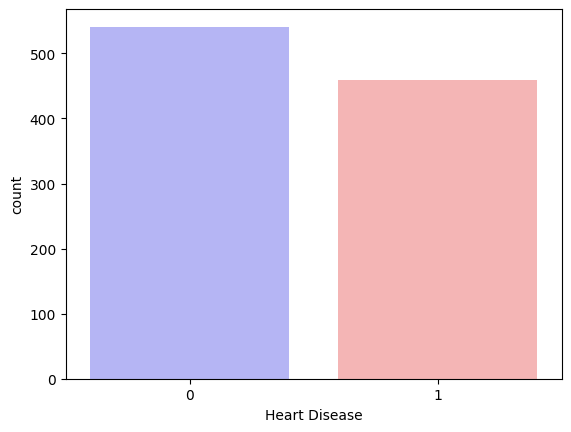

In [42]:
sns.countplot(x="Heart Disease", data=synthetic_data_ctgan, palette="bwr")
plt.show()

In [43]:
percentage_presence = (synthetic_data_ctgan['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_ctgan['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 45.90%
Percentage of patients without heart disease: 54.10%


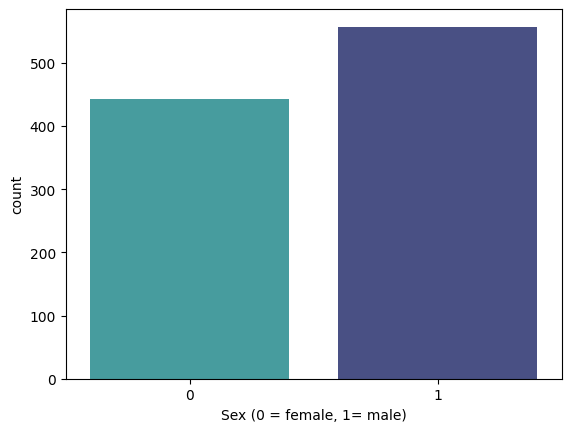

In [44]:
sns.countplot(x='Sex', data=synthetic_data_ctgan, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [45]:
countFemale = len(synthetic_data_ctgan[synthetic_data_ctgan.Sex == 0])
countMale = len(synthetic_data_ctgan[synthetic_data_ctgan.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_ctgan.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_ctgan.Sex))*100)))

Percentage of Female Patients: 44.30%
Percentage of Male Patients: 55.70%


In [46]:
synthetic_data_ctgan.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,60.266174,0.567468,133.277264,342.524954,0.397412,1.068392,159.203327,0.356747,2.045102,1.255083,0.386322,0.358595,0.402957,0.471349,0.580407,0.323475,0.417745,0.510166,0.547135,0.323475
1,59.019608,0.544662,132.921569,338.858388,0.429194,1.017429,159.006536,0.396514,2.083007,1.372549,0.427015,0.342048,0.335512,0.496732,0.599129,0.324619,0.516340,0.466231,0.498911,0.372549


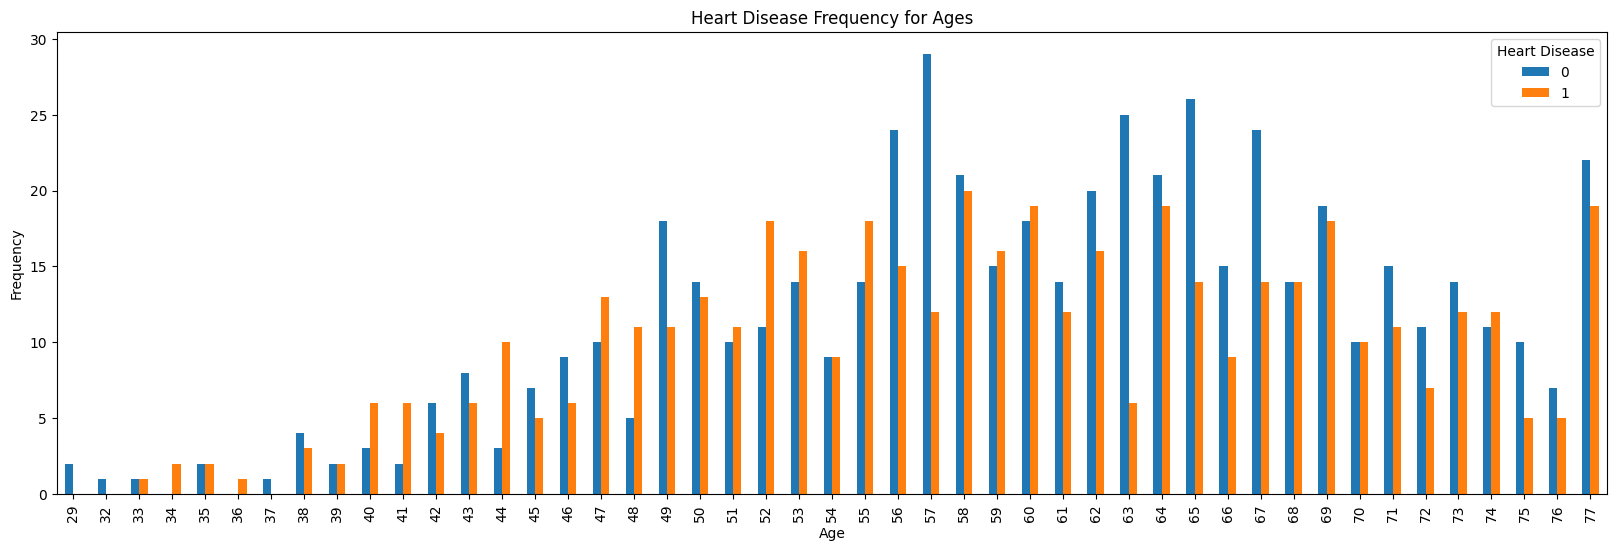

In [47]:
pd.crosstab(synthetic_data_ctgan['Age'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

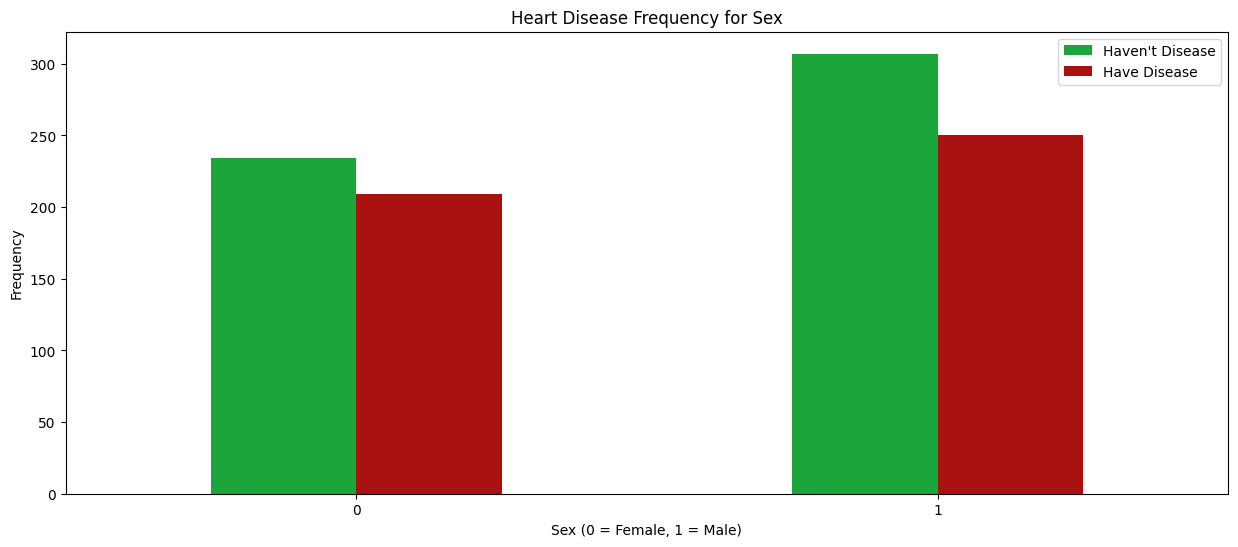

In [48]:
pd.crosstab(synthetic_data_ctgan['Sex'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

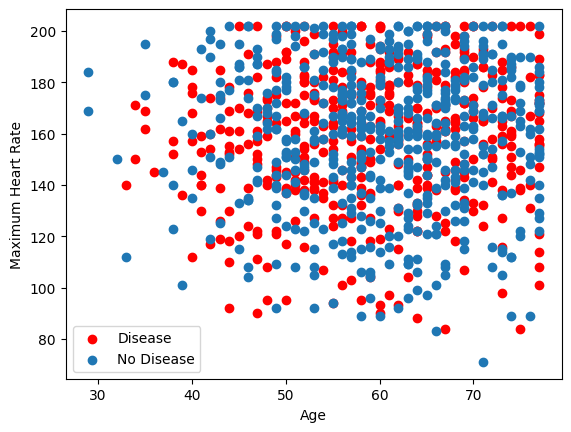

In [49]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_ctgan.Age[synthetic_data_ctgan['Heart Disease']==1], 
            y=synthetic_data_ctgan['Max HR'][synthetic_data_ctgan['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_ctgan.Age[synthetic_data_ctgan['Heart Disease']==0], 
            y=synthetic_data_ctgan['Max HR'][synthetic_data_ctgan['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


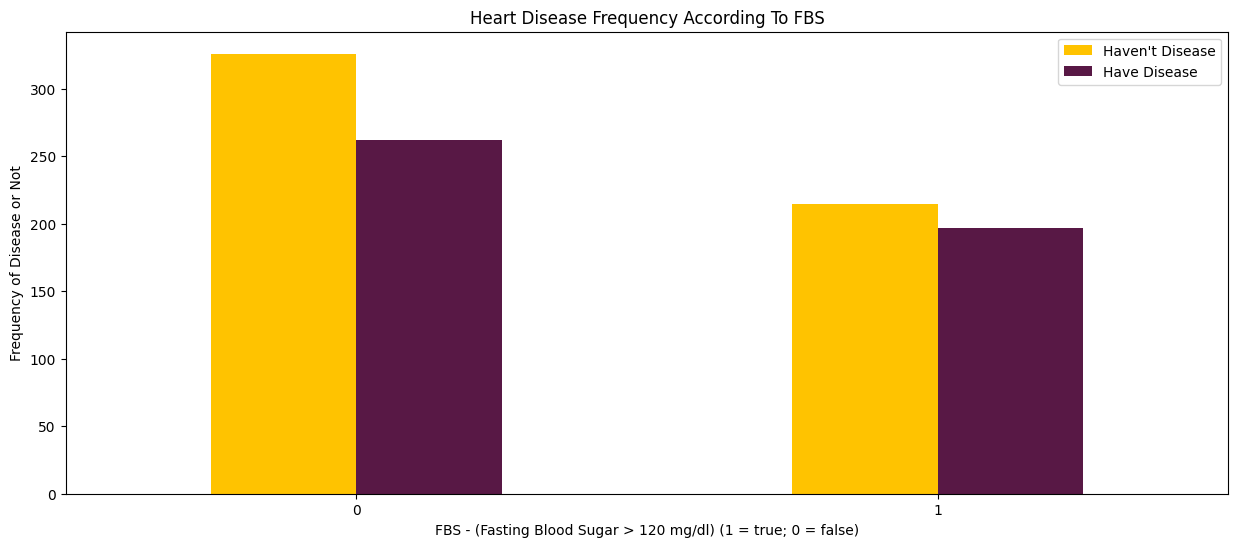

In [50]:
pd.crosstab(synthetic_data_ctgan['FBS over 120'],synthetic_data_ctgan['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [51]:
synthetic_data_ctgan.shape

(1000, 21)

In [52]:
df_hr_disease.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro',
       'Heart Disease', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3'],
      dtype='object')

In [53]:
synthetic_data_ctgan.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro',
       'Heart Disease', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3'],
      dtype='object')

SDV Gaussian Coupola 

In [54]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
coupGauss = GaussianCopulaSynthesizer(metadata=metadata)

# Fit the CTGAN model to your data
coupGauss.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_coupGauss = coupGauss.sample(10000)

# Display the head of the synthetic dataset
print(synthetic_data_coupGauss.head())

   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   57    1  123          288             0            0     128   
1   53    1  123          182             0            0     169   
2   51    1  123          171             0            0     168   
3   47    1  123          350             0            0     134   
4   48    0  123          264             0            0     152   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            1.0                        0  ...     0     0   
1                0            2.0                        0  ...     1     0   
2                0            2.5                        1  ...     0     0   
3                1            3.5                        0  ...     0     0   
4                0            0.8                        0  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     0     1       0       0       1        0   

In [55]:
coupGauss.get_learned_distributions()

{'Age': {'distribution': 'beta',
  'learned_parameters': {'loc': 21.42263510498467,
   'scale': 59.782375765265265,
   'a': 5.381093925349333,
   'b': 4.367237255534249}},
 'Sex': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0038196128745667467,
   'scale': 0.9944246194254931,
   'a': 0.9343480142479993,
   'b': 0.9663370934288618}},
 'BP': {'distribution': 'beta',
  'learned_parameters': {'loc': 122.99999999680051,
   'scale': 162.1050092376899,
   'a': 0.19452249405807387,
   'b': 68.48942734315185}},
 'Cholesterol': {'distribution': 'beta',
  'learned_parameters': {'loc': 125.41158381523343,
   'scale': 449.78248498472266,
   'a': 2.1900686050571636,
   'b': 5.819983935028095}},
 'FBS over 120': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0031949961980615076,
   'scale': 0.9953315061484289,
   'a': 0.9611971648964233,
   'b': 0.9581006421223468}},
 'EKG results': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.001410746902108024,
   'scale': 0

In [56]:
synthetic_data_coupGauss.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,57,1,123,288,0,0,128,0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
1,53,1,123,182,0,0,169,0,2.0,0,...,1,0,0,0,0,0,0,0,1,1
2,51,1,123,171,0,0,168,0,2.5,1,...,0,0,1,1,0,0,1,1,0,0
3,47,1,123,350,0,0,134,1,3.5,0,...,0,0,0,1,0,0,1,1,1,1
4,48,0,123,264,0,0,152,0,0.8,0,...,0,0,1,0,1,0,1,1,0,0


In [57]:
synthetic_data_coupGauss['Heart Disease'].value_counts()

Heart Disease
0    5775
1    4225
Name: count, dtype: int64

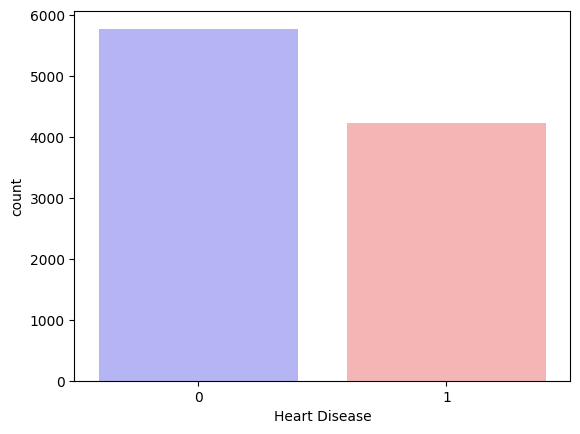

In [58]:
sns.countplot(x="Heart Disease", data=synthetic_data_coupGauss, palette="bwr")
plt.show()

In [59]:
percentage_presence = (synthetic_data_coupGauss['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_coupGauss['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 42.25%
Percentage of patients without heart disease: 57.75%


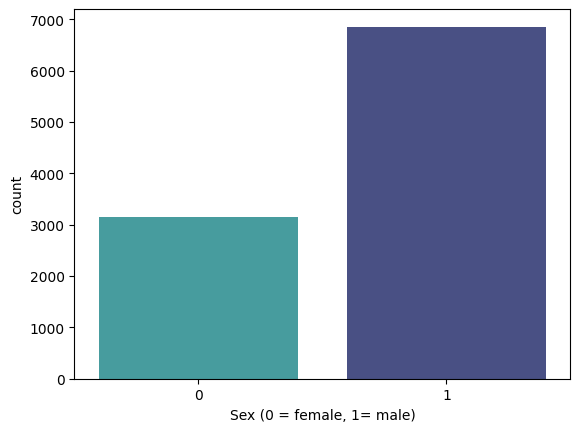

In [60]:
sns.countplot(x='Sex', data=synthetic_data_coupGauss, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [61]:
countFemale = len(synthetic_data_coupGauss[synthetic_data_coupGauss.Sex == 0])
countMale = len(synthetic_data_coupGauss[synthetic_data_coupGauss.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_coupGauss.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_coupGauss.Sex))*100)))

Percentage of Female Patients: 31.43%
Percentage of Male Patients: 68.57%


In [62]:
synthetic_data_coupGauss.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,53.722078,0.631515,123.335411,245.857143,0.156190,0.993074,154.547532,0.243117,1.162372,0.644329,0.134372,0.198268,0.313593,0.368139,0.660606,0.062338,0.295065,0.540779,0.393420,0.076883
1,55.403550,0.759763,123.508639,250.899172,0.147219,1.134911,142.636213,0.467692,1.624757,0.671479,0.125917,0.136331,0.235740,0.606627,0.458935,0.067929,0.496568,0.412781,0.510059,0.073373


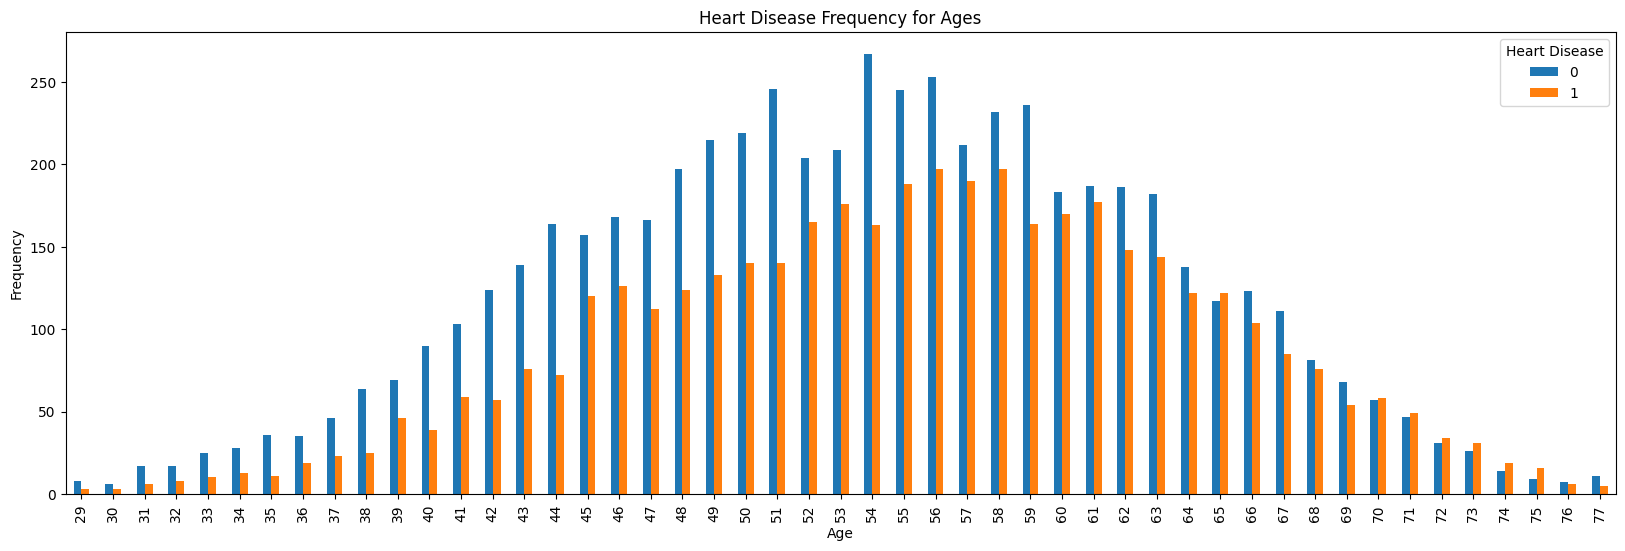

In [63]:
pd.crosstab(synthetic_data_coupGauss['Age'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

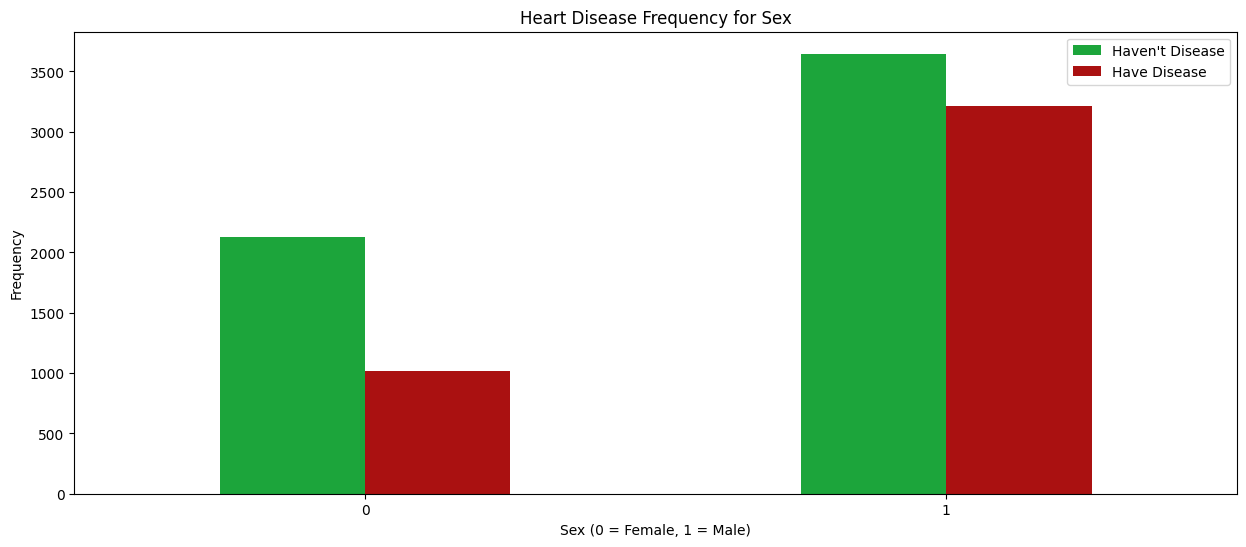

In [64]:
pd.crosstab(synthetic_data_coupGauss['Sex'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

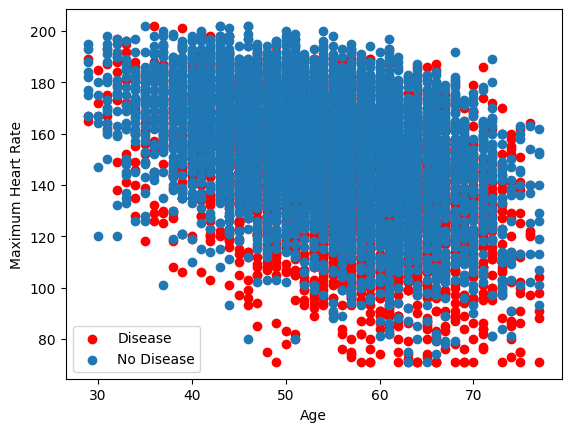

In [65]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_coupGauss.Age[synthetic_data_coupGauss['Heart Disease']==1], 
            y=synthetic_data_coupGauss['Max HR'][synthetic_data_coupGauss['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_coupGauss.Age[synthetic_data_coupGauss['Heart Disease']==0], 
            y=synthetic_data_coupGauss['Max HR'][synthetic_data_coupGauss['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


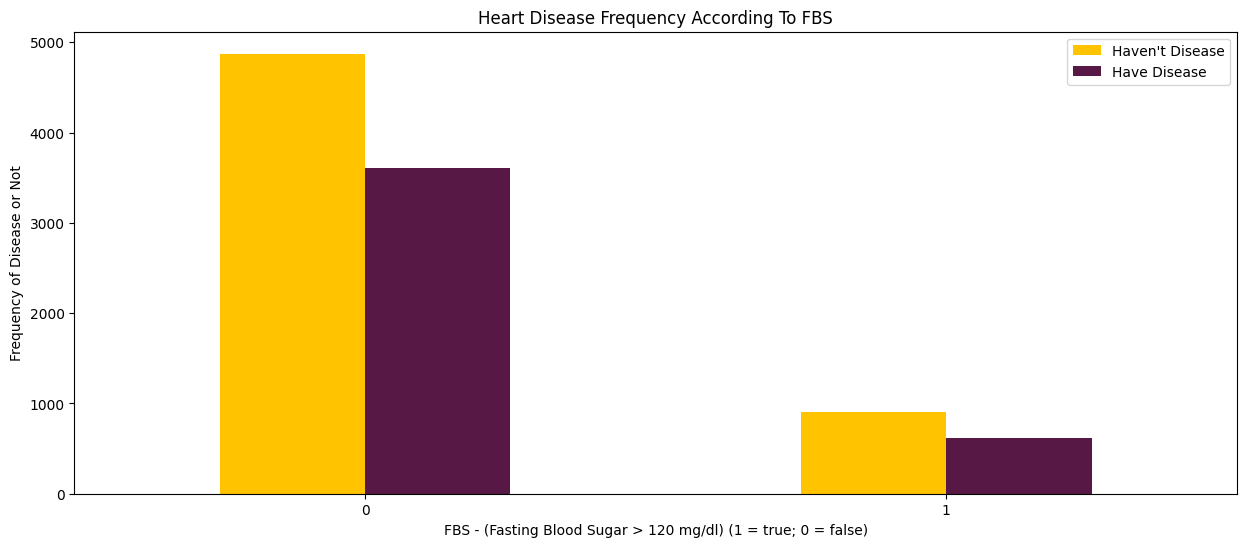

In [66]:
pd.crosstab(synthetic_data_coupGauss['FBS over 120'],synthetic_data_coupGauss['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Synthetic data generated by Gaussian Coupola Method seems to be very realistic to the real one

SDV Coupola GAN

In [67]:
from sdv.single_table import CopulaGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
coupGAN = CopulaGANSynthesizer(metadata=metadata, epochs=5, verbose=True)

# Fit the CTGAN model to your data
coupGAN.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_coupGAN = coupGAN.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_coupGAN.head())

Gen. (0.83) | Discrim. (-0.10): 100%|██████████| 5/5 [00:00<00:00, 19.28it/s]


   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   29    1  123          133             1            1     191   
1   53    0  123          251             1            2     173   
2   29    1  123          295             1            2     157   
3   46    0  128          175             1            2     158   
4   30    1  126          184             1            2     172   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                1            6.2                        0  ...     0     0   
1                0            1.4                        1  ...     1     0   
2                1            0.1                        0  ...     1     1   
3                0            6.2                        2  ...     1     0   
4                0            2.1                        3  ...     0     1   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     1     0       1       0       0        0   

In [68]:
coupGAN.get_learned_distributions()

{'Age': {'distribution': 'beta',
  'learned_parameters': {'loc': 21.42263510498467,
   'scale': 59.782375765265265,
   'a': 5.381093925349333,
   'b': 4.367237255534249}},
 'BP': {'distribution': 'beta',
  'learned_parameters': {'loc': 122.99999999680051,
   'scale': 162.1050092376899,
   'a': 0.19452249405807387,
   'b': 68.48942734315185}},
 'Cholesterol': {'distribution': 'beta',
  'learned_parameters': {'loc': 125.41158381523343,
   'scale': 449.78248498472266,
   'a': 2.1900686050571636,
   'b': 5.819983935028095}},
 'Max HR': {'distribution': 'beta',
  'learned_parameters': {'loc': -112.51948823199255,
   'scale': 325.6059504846236,
   'a': 24.402514400991734,
   'b': 5.90194242635072}},
 'ST depression': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.09999999999999999,
   'scale': 6.37706732934635,
   'a': 0.7948764292766151,
   'b': 3.2223617171896435}}}

In [69]:
coupGAN.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,tensor(0.8166),tensor(-0.0060)
1,1,tensor(0.8256),tensor(0.0128)
2,2,tensor(0.8243),tensor(-0.0198)
3,3,tensor(0.8547),tensor(-0.0788)
4,4,tensor(0.8272),tensor(-0.1035)


In [70]:
synthetic_data_coupGAN.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,29,1,123,133,1,1,191,1,6.2,0,...,0,0,1,0,1,0,0,0,1,1
1,53,0,123,251,1,2,173,0,1.4,1,...,1,0,0,1,1,0,0,0,0,0
2,29,1,123,295,1,2,157,1,0.1,0,...,1,1,1,1,1,1,1,1,1,0
3,46,0,128,175,1,2,158,0,6.2,2,...,1,0,0,1,1,0,0,1,0,1
4,30,1,126,184,1,2,172,0,2.1,3,...,0,1,0,0,1,1,0,0,1,0


In [71]:
synthetic_data_coupGAN['Heart Disease'].value_counts()

Heart Disease
1    524
0    476
Name: count, dtype: int64

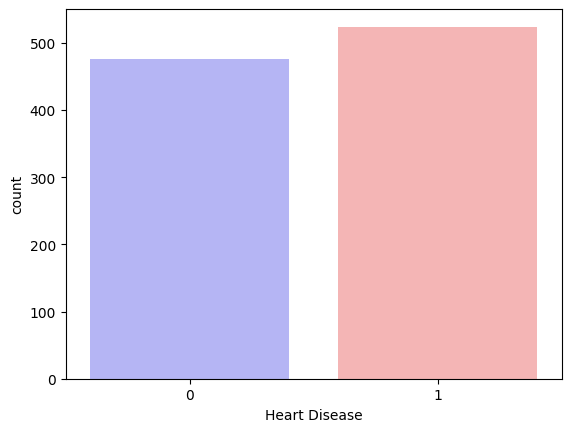

In [72]:
sns.countplot(x="Heart Disease", data=synthetic_data_coupGAN, palette="bwr")
plt.show()

In [73]:
percentage_presence = (synthetic_data_coupGAN['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_coupGAN['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 52.40%
Percentage of patients without heart disease: 47.60%


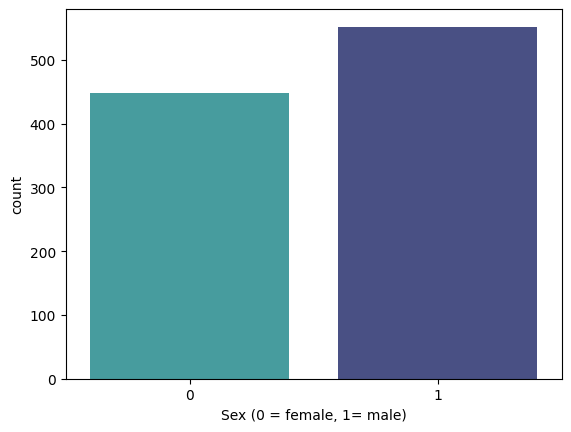

In [74]:
sns.countplot(x='Sex', data=synthetic_data_coupGAN, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [75]:
countFemale = len(synthetic_data_coupGAN[synthetic_data_coupGAN.Sex == 0])
countMale = len(synthetic_data_coupGAN[synthetic_data_coupGAN.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_coupGAN.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_coupGAN.Sex))*100)))

Percentage of Female Patients: 44.80%
Percentage of Male Patients: 55.20%


this is great that coupola GAN synthetizer balanced gender data on its own!

In [76]:
synthetic_data_coupGAN.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,39.271008,0.567227,127.457983,244.827731,0.571429,1.163866,160.632353,0.495798,1.910714,1.313025,0.466387,0.390756,0.432773,0.510504,0.533613,0.476891,0.436975,0.514706,0.485294,0.331933
1,40.538168,0.538168,126.900763,228.574427,0.612595,1.104962,163.236641,0.505725,1.934733,1.297710,0.459924,0.370229,0.414122,0.610687,0.540076,0.448473,0.549618,0.469466,0.431298,0.339695


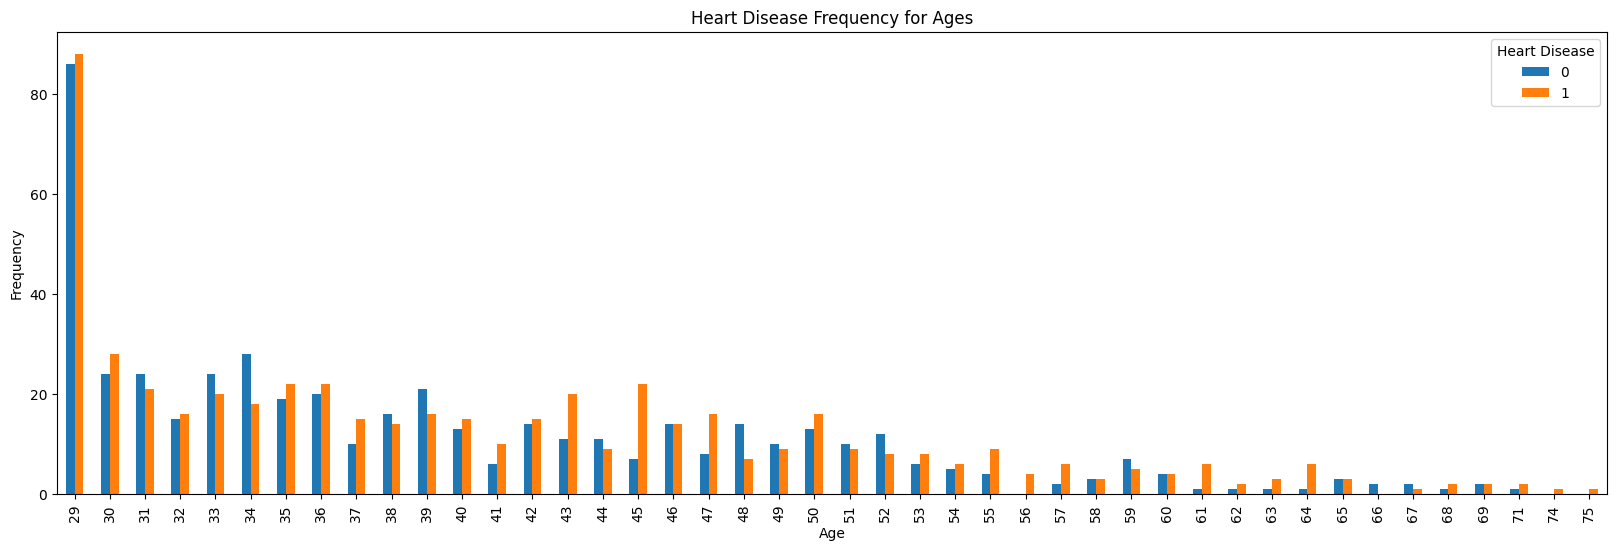

In [77]:
pd.crosstab(synthetic_data_coupGAN['Age'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

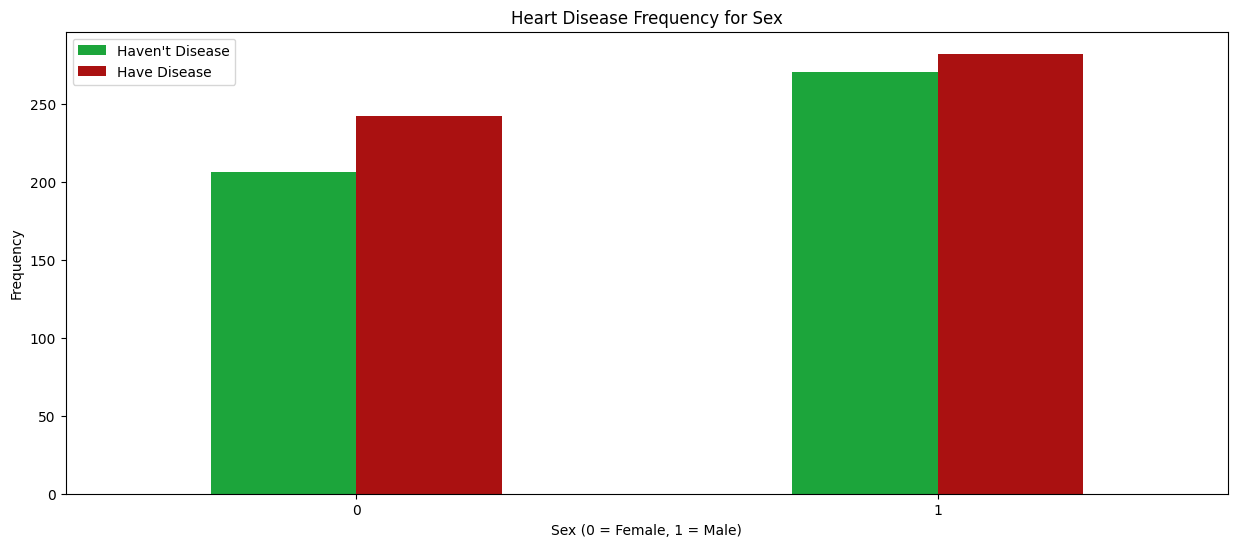

In [78]:
pd.crosstab(synthetic_data_coupGAN['Sex'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

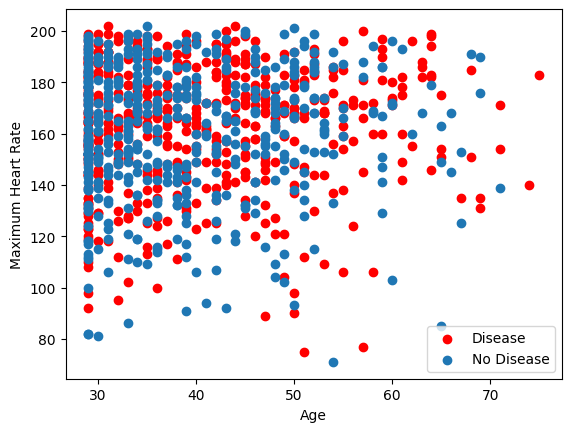

In [79]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_coupGAN.Age[synthetic_data_coupGAN['Heart Disease']==1], 
            y=synthetic_data_coupGAN['Max HR'][synthetic_data_coupGAN['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_coupGAN.Age[synthetic_data_coupGAN['Heart Disease']==0], 
            y=synthetic_data_coupGAN['Max HR'][synthetic_data_coupGAN['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


HR is all over the place tho

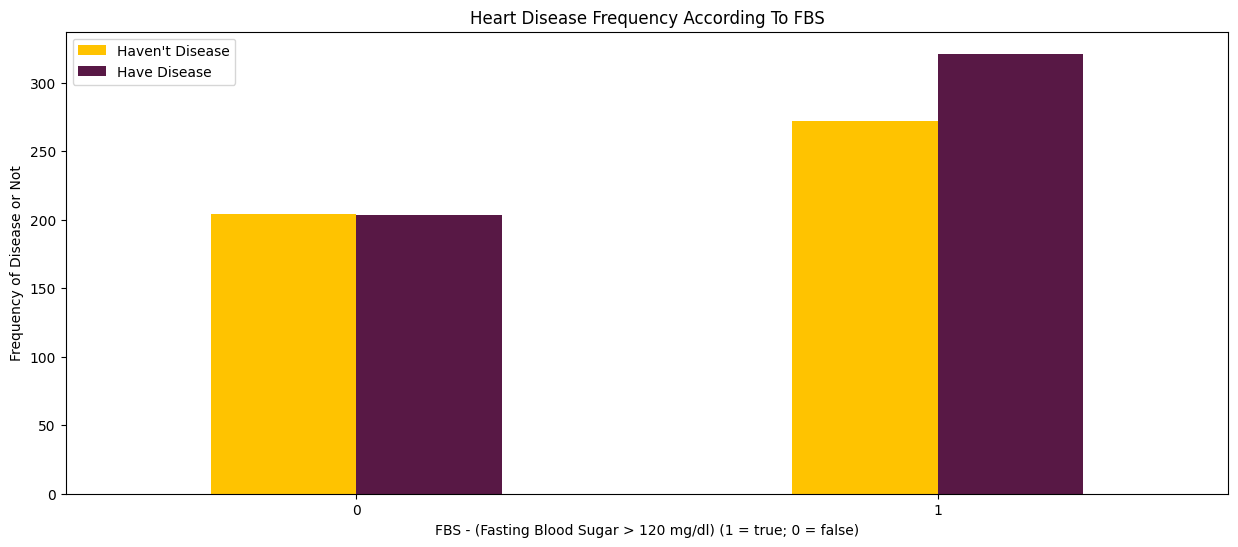

In [80]:
pd.crosstab(synthetic_data_coupGAN['FBS over 120'],synthetic_data_coupGAN['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

out of CTGAN, Coupola GAN and Gaussian Coupola synthetizers, by data exploration comparison to the original datset Gaussian Coupola syntetizer seems to have created the most realistic dataset.

The Gaussian Copula method can yield realistic synthetic datasets because it's particularly good at capturing and modeling the joint distribution of the variables in your dataset. It does so by modeling the marginal distribution of each variable and then using a copula to model their correlation structure. This can sometimes result in synthetic data that closely resembles the correlations and interactions in your original data, which might explain why it seems more realistic compared to other methods.

To create a synthetic dataset with a 50-50 gender ratio using the Gaussian Copula method, you can modify the metadata to specify that the Sex column should have a balanced distribution. However, sdv does not support direct manipulation of class proportions within the synthesizer itself. You would need to manually adjust the dataset after generation or use a different method to enforce this balance during generation.

An alternative approach would be to generate a synthetic dataset and then resample it to achieve the desired gender ratio:

Generate a large synthetic dataset with the Gaussian Copula method.
Split the synthetic dataset by gender.
Resample from each gender group to have an equal number of instances.
Combine the resampled groups back into a single dataset.

sdg - mitigating gender imbalance with Gaussian Coupola 

In [81]:


# Split the dataset by gender
male_data = synthetic_data_coupGauss[synthetic_data_coupGauss['Sex'] == 1]
female_data = synthetic_data_coupGauss[synthetic_data_coupGauss['Sex'] == 0]

# Resample to get a balanced dataset
balanced_male_data = male_data.sample(3000)
balanced_female_data = female_data.sample(3000)

# Combine the resampled groups
balanced_synthetic_data = pd.concat([balanced_male_data, balanced_female_data])

# Shuffle the dataset to mix male and female rows
balanced_synthetic_data = balanced_synthetic_data.sample(frac=1).reset_index(drop=True)

print(balanced_synthetic_data['Sex'].value_counts())  # Should be approximately balanced
print(balanced_synthetic_data.head())


Sex
0    3000
1    3000
Name: count, dtype: int64
   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   61    0  123          247             0            0     125   
1   70    0  128          348             0            2     120   
2   44    1  123          209             0            2     179   
3   44    0  125          318             0            0     180   
4   56    1  123          175             0            2     116   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            3.0                        0  ...     0     0   
1                0            0.4                        2  ...     0     0   
2                0            0.2                        2  ...     0     0   
3                0            0.7                        0  ...     0     0   
4                0            1.7                        3  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  

In [82]:
balanced_synthetic_data.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,61,0,123,247,0,0,125,0,3.0,0,...,0,0,0,0,1,1,0,0,0,0
1,70,0,128,348,0,2,120,0,0.4,2,...,0,0,1,0,1,0,0,0,1,0
2,44,1,123,209,0,2,179,0,0.2,2,...,0,0,1,0,1,1,0,1,1,0
3,44,0,125,318,0,0,180,0,0.7,0,...,0,0,0,0,1,0,0,1,0,0
4,56,1,123,175,0,2,116,0,1.7,3,...,0,0,0,0,1,0,0,1,0,0


In [83]:
balanced_synthetic_data['Heart Disease'].value_counts()

Heart Disease
0    3617
1    2383
Name: count, dtype: int64

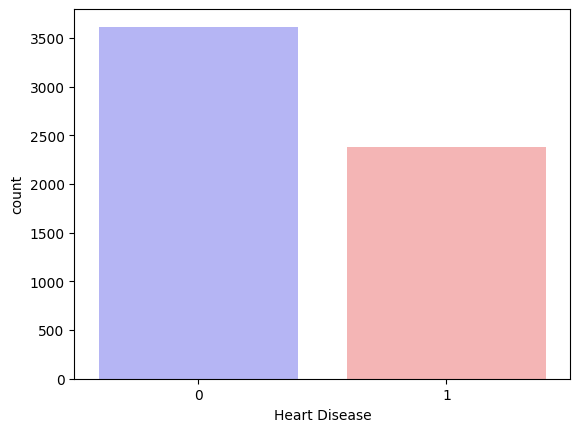

In [84]:
sns.countplot(x="Heart Disease", data=balanced_synthetic_data, palette="bwr")
plt.show()

In [85]:
percentage_presence = (balanced_synthetic_data['Heart Disease'] == 1).mean() * 100
percentage_absence = (balanced_synthetic_data['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 39.72%
Percentage of patients without heart disease: 60.28%


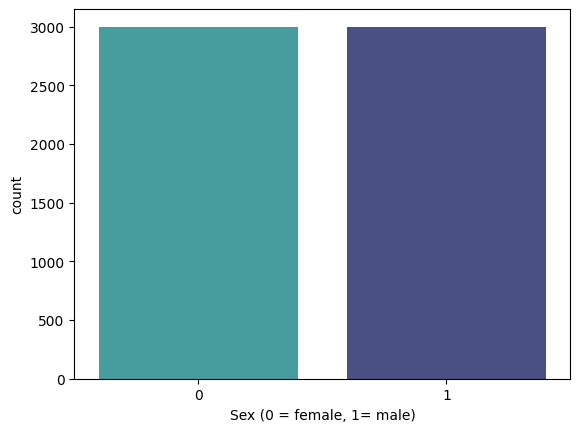

In [86]:
sns.countplot(x='Sex', data=balanced_synthetic_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [87]:
countFemale = len(balanced_synthetic_data[balanced_synthetic_data.Sex == 0])
countMale = len(balanced_synthetic_data[balanced_synthetic_data.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(balanced_synthetic_data.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(balanced_synthetic_data.Sex))*100)))

Percentage of Female Patients: 50.00%
Percentage of Male Patients: 50.00%


In [88]:
balanced_synthetic_data.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,53.859829,0.441250,123.336743,248.377385,0.152613,0.987006,154.508709,0.243572,1.150539,0.662980,0.131877,0.196295,0.314902,0.370473,0.687310,0.060547,0.278408,0.530274,0.383743,0.076859
1,55.733949,0.589173,123.521611,253.731431,0.143517,1.130927,142.724717,0.477549,1.593831,0.676878,0.125892,0.129249,0.237516,0.605539,0.484683,0.065883,0.478808,0.404952,0.510701,0.076374


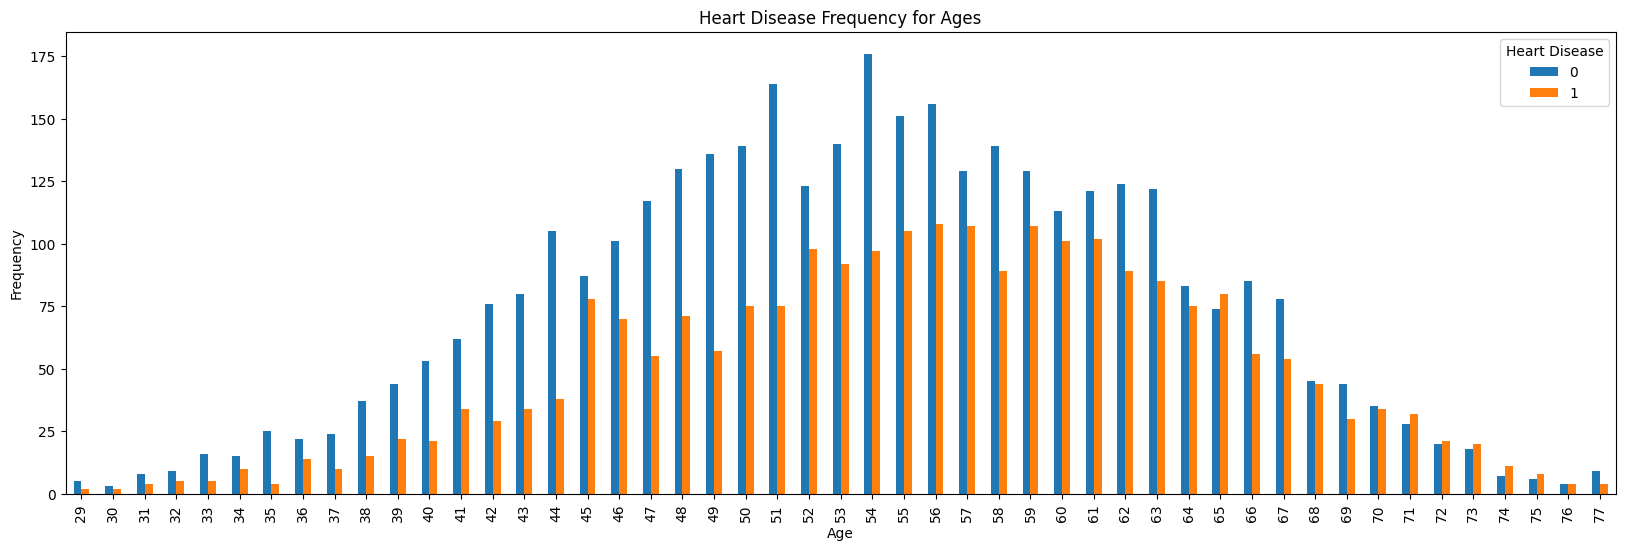

In [89]:
pd.crosstab(balanced_synthetic_data['Age'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

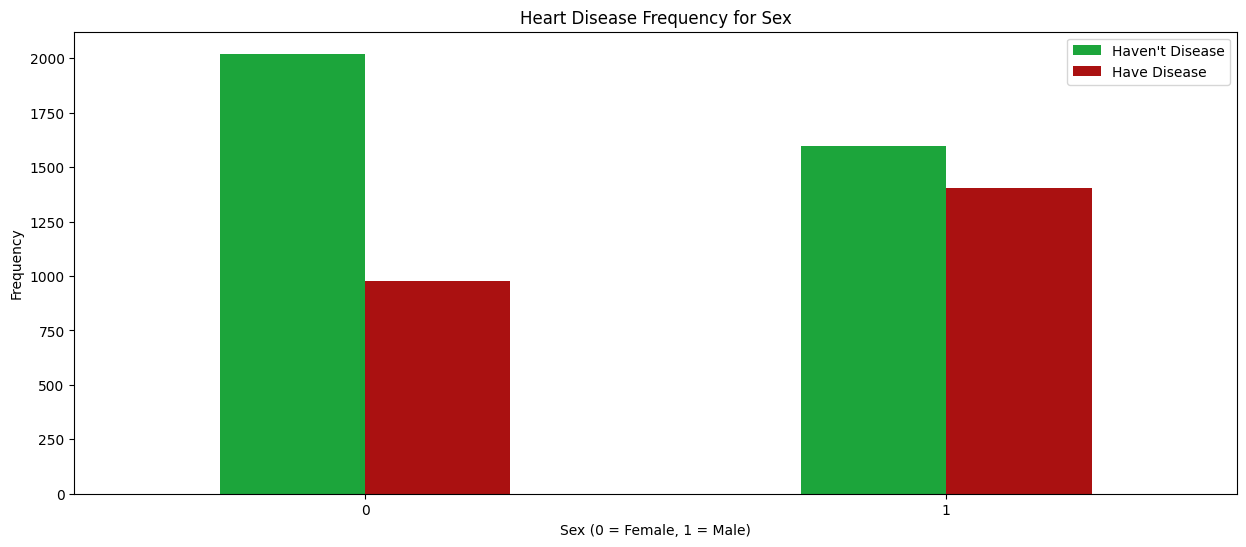

In [90]:
pd.crosstab(balanced_synthetic_data['Sex'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

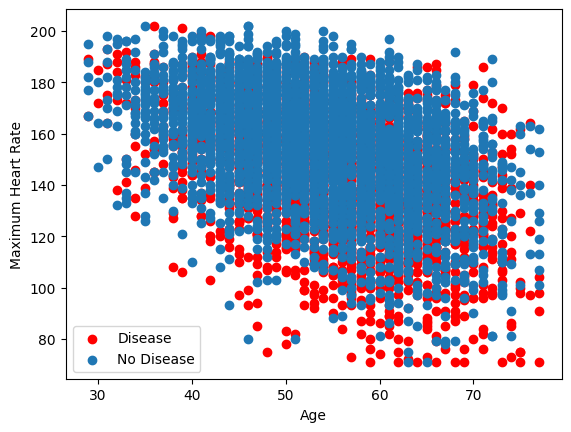

In [91]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=balanced_synthetic_data.Age[balanced_synthetic_data['Heart Disease']==1], 
            y=balanced_synthetic_data['Max HR'][balanced_synthetic_data['Heart Disease']==1], c="red")
plt.scatter(x=balanced_synthetic_data.Age[balanced_synthetic_data['Heart Disease']==0], 
            y=balanced_synthetic_data['Max HR'][balanced_synthetic_data['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


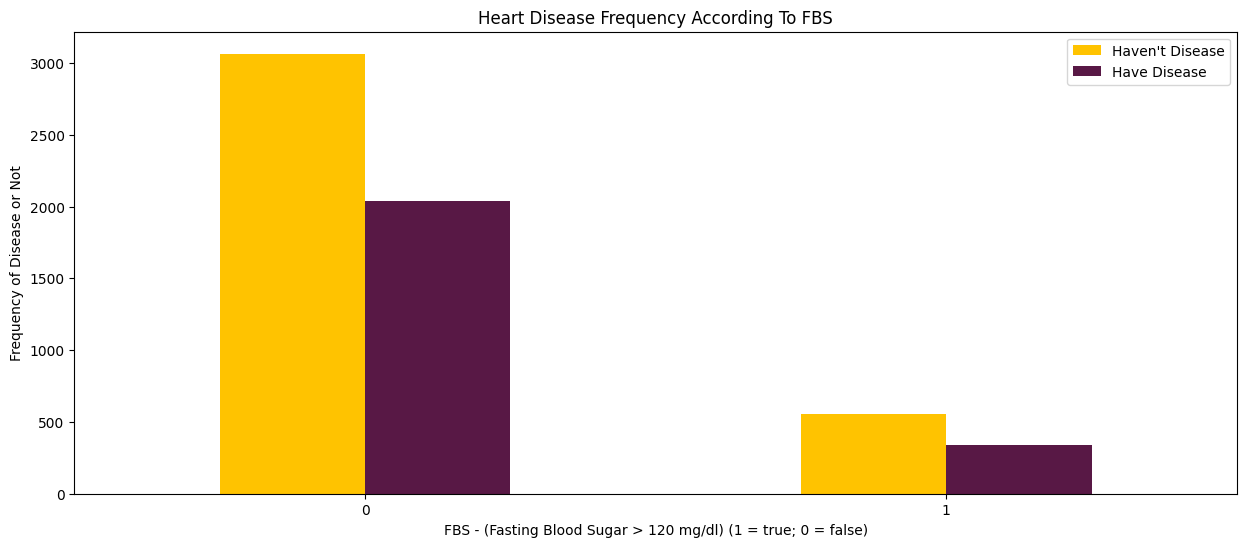

In [92]:
pd.crosstab(balanced_synthetic_data['FBS over 120'],balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

sdg - further balancing to mitigate disease presence imbalance of gender balanced gaussian coupola dataset

In [93]:
# Split the synthetic dataset by disease presence
disease_data = balanced_synthetic_data[balanced_synthetic_data['Heart Disease'] == 1]
no_disease_data = balanced_synthetic_data[balanced_synthetic_data['Heart Disease'] == 0]

# Calculate the minimum count to balance the classes
min_count = min(len(disease_data), len(no_disease_data))

# Resample to get balanced datasets
balanced_disease_data = disease_data.sample(min_count)
balanced_no_disease_data = no_disease_data.sample(min_count)

# Combine the resampled groups to have an equal representation
final_balanced_synthetic_data = pd.concat([balanced_disease_data, balanced_no_disease_data])

# Shuffle the dataset to mix the rows with and without disease
final_balanced_synthetic_data = final_balanced_synthetic_data.sample(frac=1).reset_index(drop=True)

print(final_balanced_synthetic_data['Heart Disease'].value_counts())  # Should be balanced
print(final_balanced_synthetic_data.head())

Heart Disease
0    2383
1    2383
Name: count, dtype: int64
   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   51    1  123          141             0            1     161   
1   43    0  123          252             0            0     122   
2   50    0  123          223             0            2     152   
3   57    0  123          248             0            2     137   
4   66    1  123          235             0            2     118   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            0.7                        2  ...     0     0   
1                0            0.8                        0  ...     1     0   
2                0            2.2                        0  ...     0     0   
3                1            0.7                        0  ...     0     0   
4                0            2.9                        1  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2 

In [94]:
final_balanced_synthetic_data.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,51,1,123,141,0,1,161,0,0.7,2,...,0,0,0,0,0,0,1,0,0,1
1,43,0,123,252,0,0,122,0,0.8,0,...,1,0,0,1,0,0,1,0,1,0
2,50,0,123,223,0,2,152,0,2.2,0,...,0,0,0,0,0,0,1,0,1,0
3,57,0,123,248,0,2,137,1,0.7,0,...,0,0,1,0,0,0,0,0,1,0
4,66,1,123,235,0,2,118,0,2.9,1,...,0,0,0,1,0,0,1,0,1,0


In [95]:
final_balanced_synthetic_data['Heart Disease'].value_counts()

Heart Disease
0    2383
1    2383
Name: count, dtype: int64

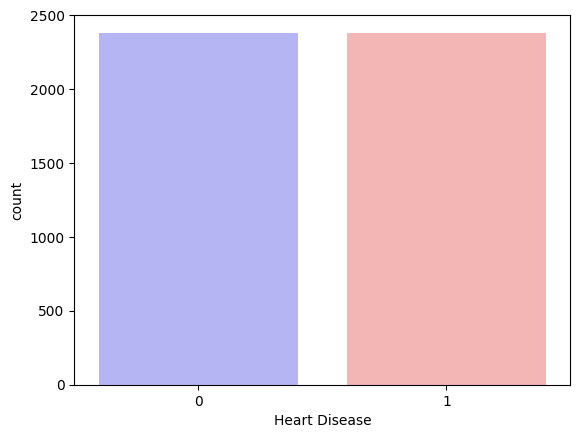

In [96]:
sns.countplot(x="Heart Disease", data=final_balanced_synthetic_data, palette="bwr")
plt.show()

In [97]:
percentage_presence = (final_balanced_synthetic_data['Heart Disease'] == 1).mean() * 100
percentage_absence = (final_balanced_synthetic_data['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 50.00%
Percentage of patients without heart disease: 50.00%


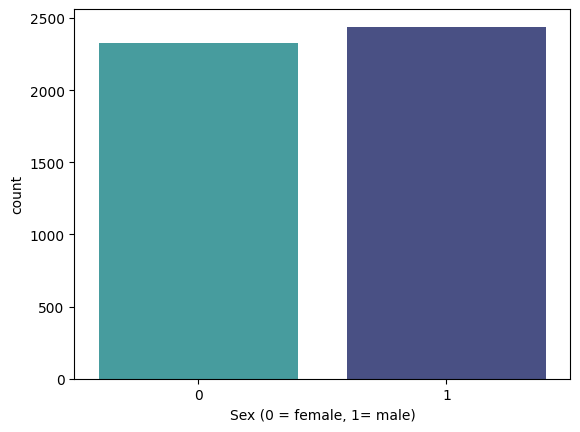

In [98]:
sns.countplot(x='Sex', data=final_balanced_synthetic_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [99]:
countFemale = len(final_balanced_synthetic_data[final_balanced_synthetic_data.Sex == 0])
countMale = len(final_balanced_synthetic_data[final_balanced_synthetic_data.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(final_balanced_synthetic_data.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(final_balanced_synthetic_data.Sex))*100)))

Percentage of Female Patients: 48.80%
Percentage of Male Patients: 51.20%


In [100]:
final_balanced_synthetic_data.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,53.874108,0.434746,123.339068,247.595888,0.156525,1.010911,154.686530,0.245489,1.148300,0.659673,0.120436,0.193034,0.313470,0.373898,0.691985,0.062107,0.279060,0.522870,0.381032,0.073856
1,55.733949,0.589173,123.521611,253.731431,0.143517,1.130927,142.724717,0.477549,1.593831,0.676878,0.125892,0.129249,0.237516,0.605539,0.484683,0.065883,0.478808,0.404952,0.510701,0.076374


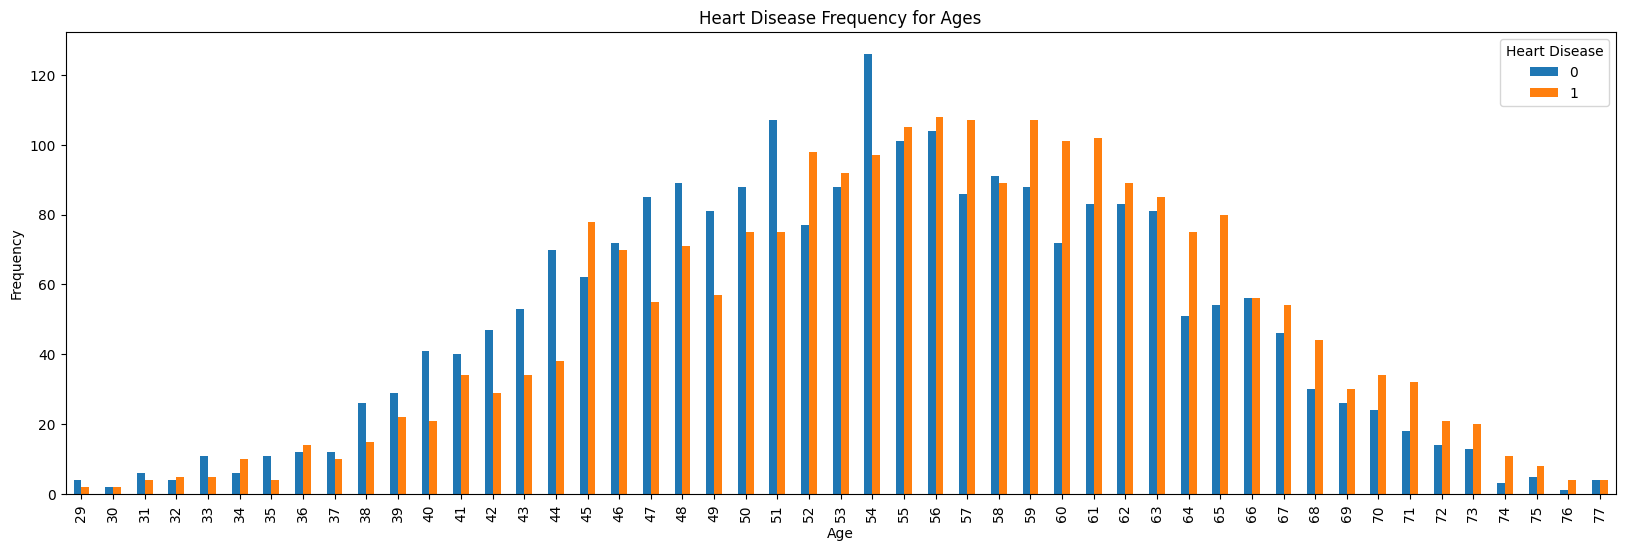

In [101]:
pd.crosstab(final_balanced_synthetic_data['Age'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

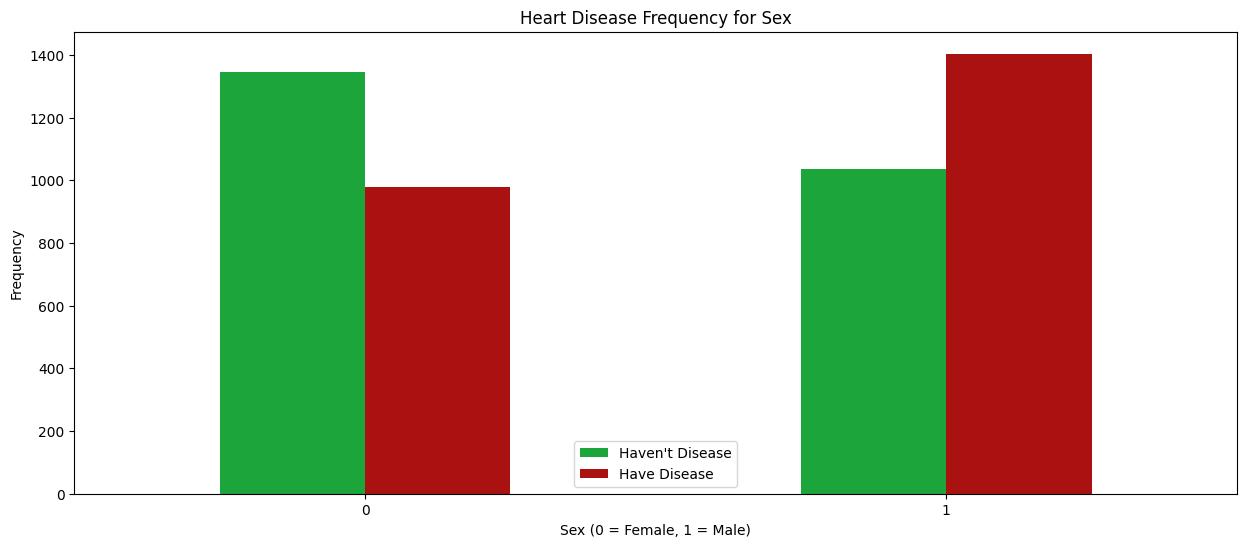

In [102]:
pd.crosstab(final_balanced_synthetic_data['Sex'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

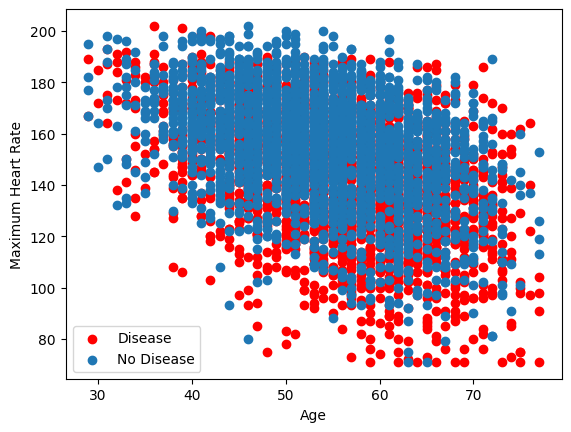

In [103]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=final_balanced_synthetic_data.Age[final_balanced_synthetic_data['Heart Disease']==1], 
            y=final_balanced_synthetic_data['Max HR'][final_balanced_synthetic_data['Heart Disease']==1], c="red")
plt.scatter(x=final_balanced_synthetic_data.Age[final_balanced_synthetic_data['Heart Disease']==0], 
            y=final_balanced_synthetic_data['Max HR'][final_balanced_synthetic_data['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


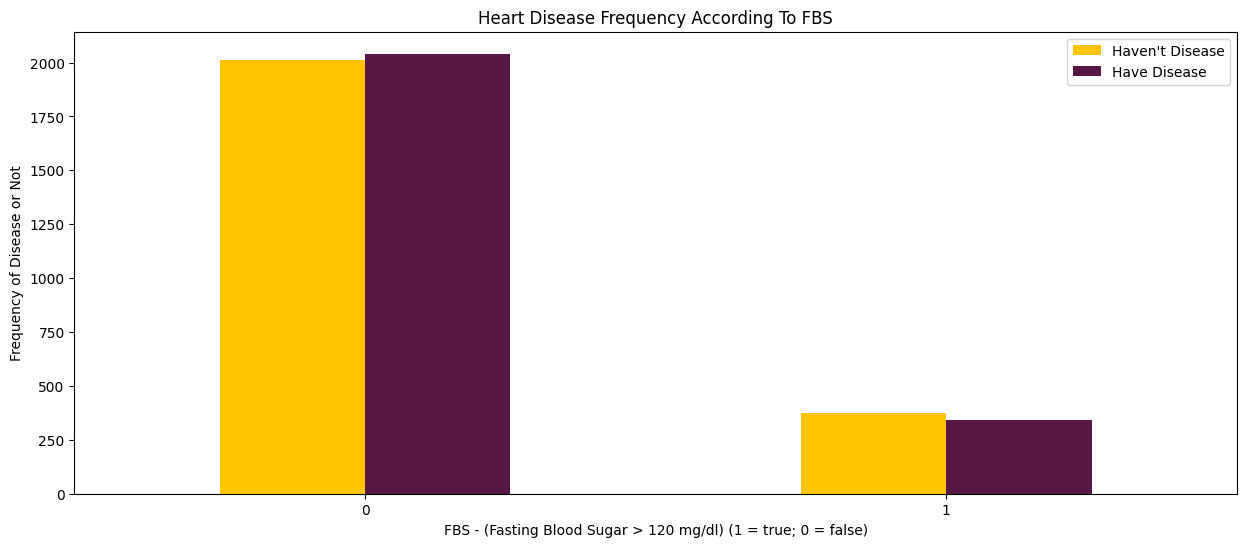

In [104]:
pd.crosstab(final_balanced_synthetic_data['FBS over 120'],final_balanced_synthetic_data['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

now balanced heart disease frequency per gender of gaussian coupola synthetic dataset

In [105]:
# Split the dataset into four groups
female_with_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 0) & (synthetic_data_coupGauss['Heart Disease'] == 1)]
female_without_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 0) & (synthetic_data_coupGauss['Heart Disease'] == 0)]
male_with_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 1) & (synthetic_data_coupGauss['Heart Disease'] == 1)]
male_without_disease = synthetic_data_coupGauss[(synthetic_data_coupGauss['Sex'] == 1) & (synthetic_data_coupGauss['Heart Disease'] == 0)]

# Find the smallest group size
min_size = min(len(female_with_disease), len(female_without_disease),
               len(male_with_disease), len(male_without_disease))

# Resample the other groups to the size of the smallest group
female_with_disease = female_with_disease.sample(min_size)
female_without_disease = female_without_disease.sample(min_size)
male_with_disease = male_with_disease.sample(min_size)
male_without_disease = male_without_disease.sample(min_size)

# Combine the subsamples into one balanced dataset
balanced_df = pd.concat([female_with_disease, female_without_disease,
                         male_with_disease, male_without_disease])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [106]:
balanced_df.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,59,0,124,205,1,2,177,0,0.8,0,...,0,0,0,0,0,0,0,1,1,0
1,65,0,123,306,0,2,127,0,0.8,2,...,1,1,0,0,0,0,1,0,1,0
2,67,1,123,214,0,0,134,1,1.9,0,...,0,0,0,1,1,0,1,0,1,0
3,72,0,123,317,0,0,165,0,1.0,1,...,0,0,0,0,1,0,0,1,1,0
4,46,1,123,296,0,2,156,1,3.0,3,...,0,0,1,0,0,0,1,0,1,0


In [107]:
balanced_df['Heart Disease'].value_counts()

Heart Disease
0    2030
1    2030
Name: count, dtype: int64

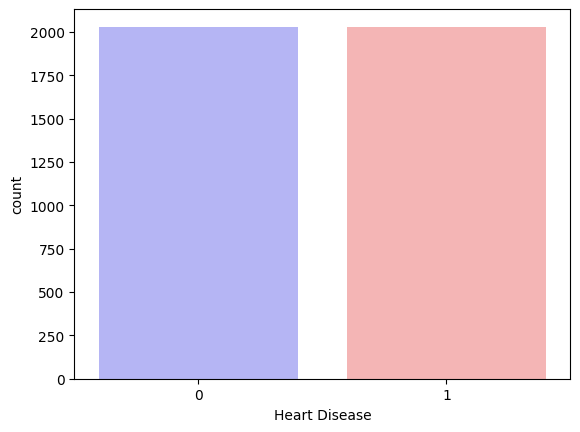

In [108]:
sns.countplot(x="Heart Disease", data=balanced_df, palette="bwr")
plt.show()

In [109]:
percentage_presence = (balanced_df['Heart Disease'] == 1).mean() * 100
percentage_absence = (balanced_df['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 50.00%
Percentage of patients without heart disease: 50.00%


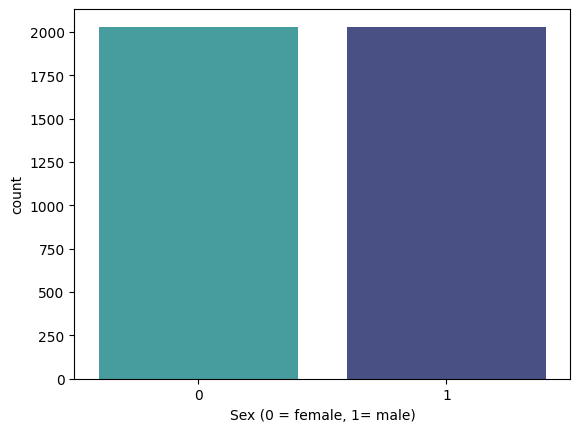

In [110]:
sns.countplot(x='Sex', data=balanced_df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [111]:
countFemale = len(balanced_df[balanced_df.Sex == 0])
countMale = len(balanced_df[balanced_df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(balanced_df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(balanced_df.Sex))*100)))

Percentage of Female Patients: 50.00%
Percentage of Male Patients: 50.00%


In [112]:
balanced_df.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,54.018719,0.5,123.362069,248.926601,0.157143,0.981281,155.036946,0.253202,1.111823,0.633990,0.131527,0.208867,0.309852,0.362562,0.680788,0.067488,0.280788,0.554187,0.382759,0.076847
1,55.731527,0.5,123.546305,253.953695,0.139901,1.120690,142.327094,0.482759,1.610246,0.678325,0.119212,0.130049,0.245813,0.601478,0.490640,0.069458,0.465517,0.400000,0.507882,0.080788


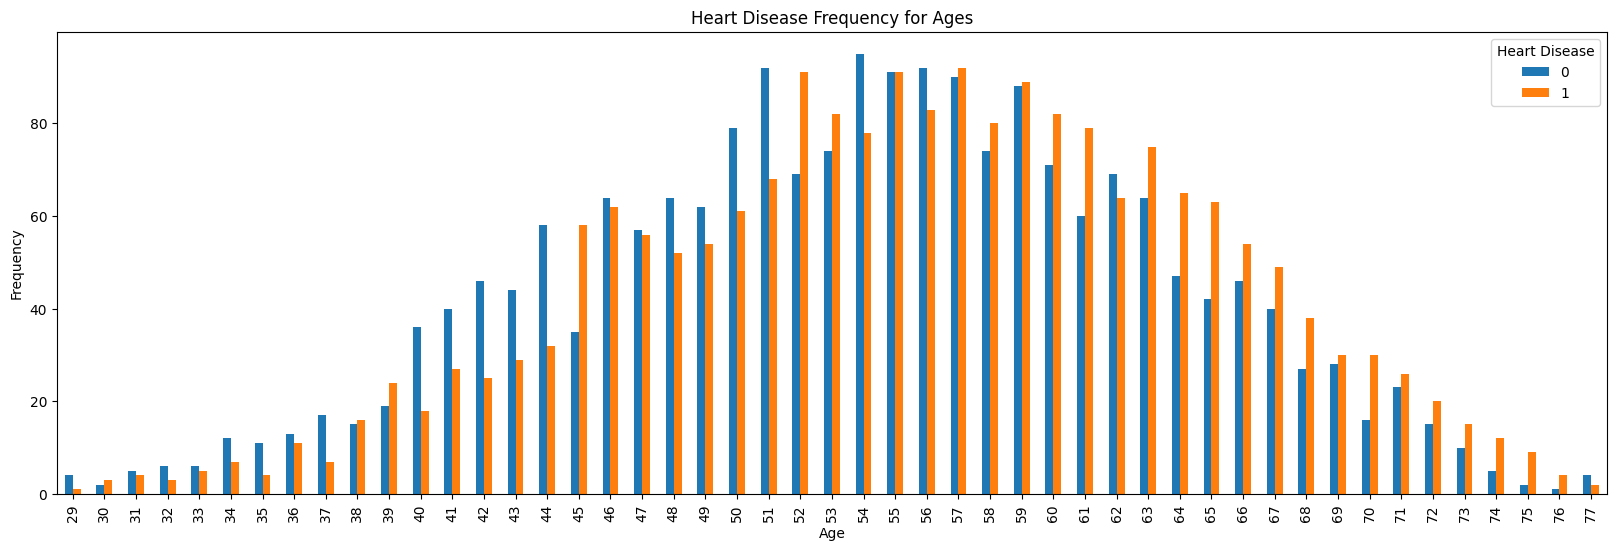

In [113]:
pd.crosstab(balanced_df['Age'], balanced_df['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

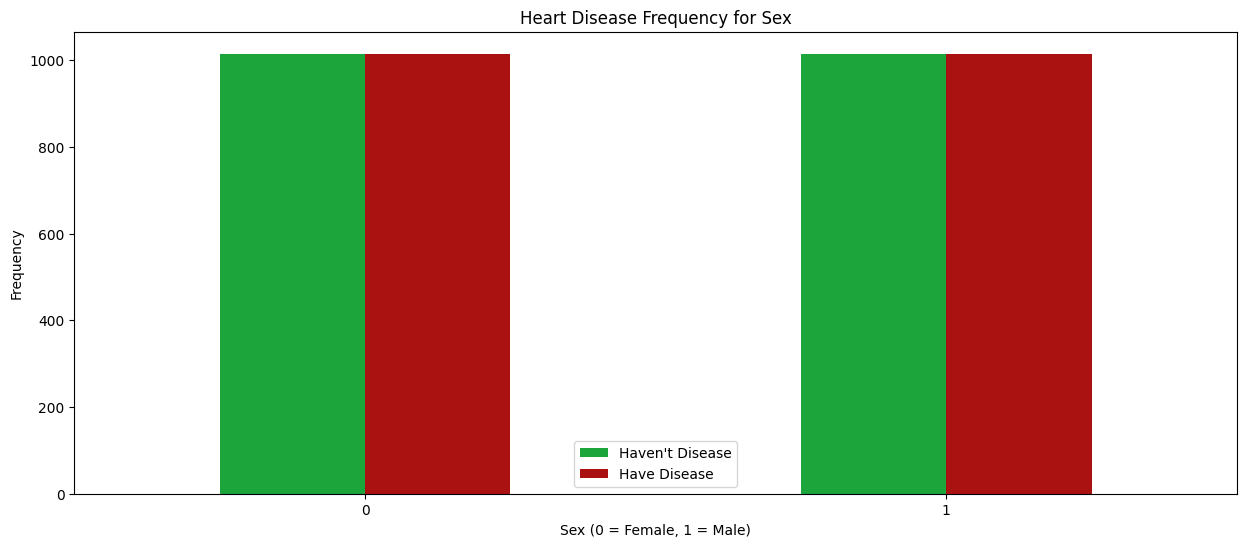

In [114]:
pd.crosstab(balanced_df['Sex'], balanced_df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

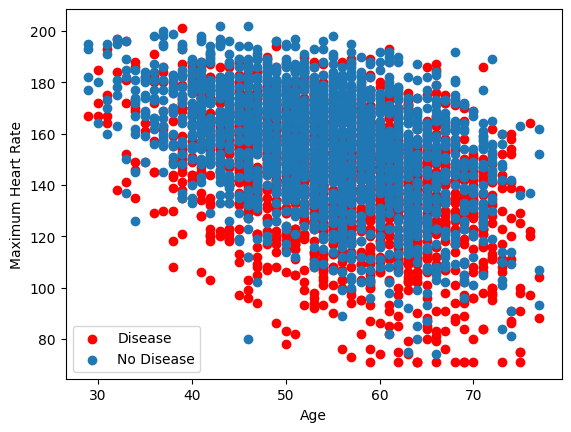

In [115]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=balanced_df.Age[balanced_df['Heart Disease']==1], 
            y=balanced_df['Max HR'][balanced_df['Heart Disease']==1], c="red")
plt.scatter(x=balanced_df.Age[balanced_df['Heart Disease']==0], 
            y=balanced_df['Max HR'][balanced_df['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


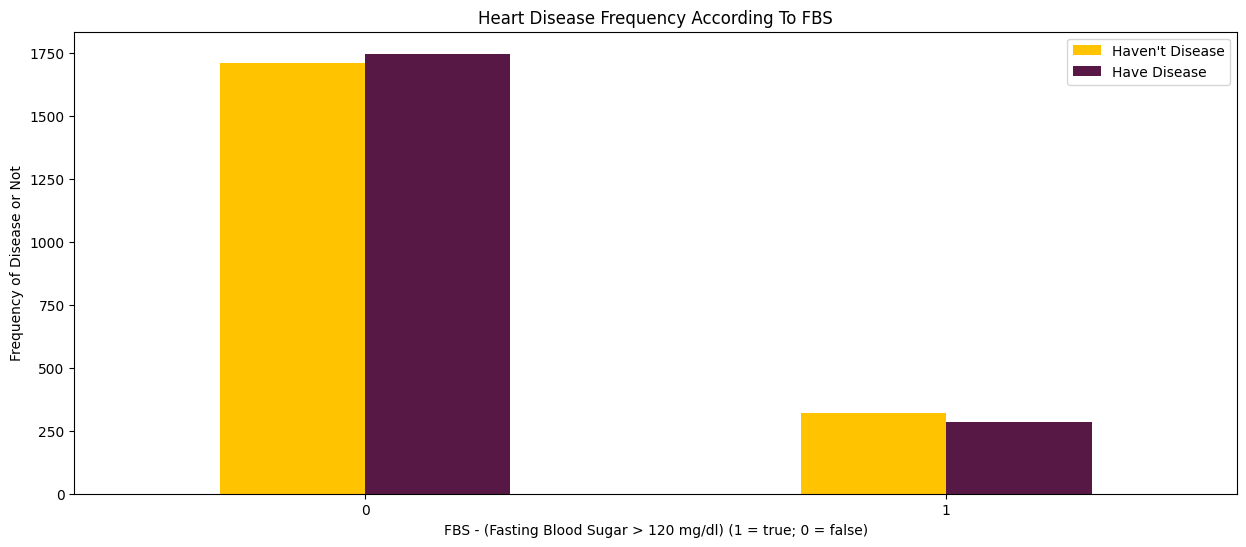

In [116]:
pd.crosstab(balanced_df['FBS over 120'],balanced_df['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

TVAE

In [117]:
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
TVAE = TVAESynthesizer(metadata=metadata, epochs=5)

# Fit the CTGAN model to your data
TVAE.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_TVAE= TVAE.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_TVAE.head())

   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   44    1  137          298             0            0     123   
1   46    1  126          323             0            0     135   
2   45    1  127          268             0            0     139   
3   53    1  123          249             0            0     127   
4   40    1  122          253             0            0     119   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0            0.1                        0  ...     0     0   
1                0            0.2                        1  ...     0     1   
2                1            0.9                        0  ...     0     0   
3                0            0.0                        0  ...     1     1   
4                1            0.1                        1  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     0     1       1       0       0        1   

In [118]:
synthetic_data_TVAE.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,44,1,137,298,0,0,123,0,0.1,0,...,0,0,0,1,1,0,0,1,1,1
1,46,1,126,323,0,0,135,0,0.2,1,...,0,1,0,0,1,0,0,0,1,0
2,45,1,127,268,0,0,139,1,0.9,0,...,0,0,0,1,1,0,1,0,1,0
3,53,1,123,249,0,0,127,0,0.0,0,...,1,1,0,0,1,0,0,1,0,0
4,40,1,122,253,0,0,119,1,0.1,1,...,0,0,0,1,1,0,0,0,1,0


In [119]:
synthetic_data_TVAE['Heart Disease'].value_counts()

Heart Disease
1    612
0    388
Name: count, dtype: int64

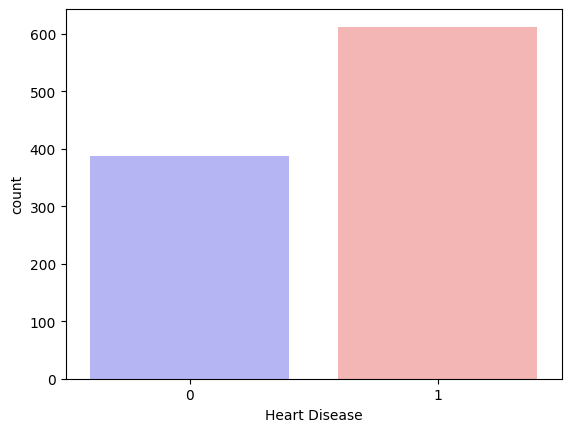

In [120]:
sns.countplot(x="Heart Disease", data=synthetic_data_TVAE, palette="bwr")
plt.show()

In [121]:
percentage_presence = (synthetic_data_TVAE['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_TVAE['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 61.20%
Percentage of patients without heart disease: 38.80%


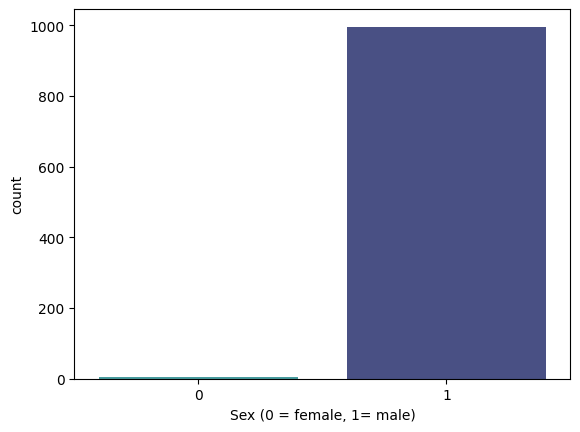

In [122]:
sns.countplot(x='Sex', data=synthetic_data_TVAE, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [123]:
countFemale = len(synthetic_data_TVAE[synthetic_data_TVAE.Sex == 0])
countMale = len(synthetic_data_TVAE[synthetic_data_TVAE.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_TVAE.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_TVAE.Sex))*100)))

Percentage of Female Patients: 0.40%
Percentage of Male Patients: 99.60%


In [124]:
synthetic_data_TVAE.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,48.768041,1.000000,127.835052,276.213918,0.03866,0.077320,129.618557,0.471649,0.412113,0.389175,0.275773,0.206186,0.064433,0.762887,1.000000,0.041237,0.193299,0.463918,0.621134,0.190722
1,50.089869,0.993464,128.645425,274.220588,0.00817,0.081699,131.129085,0.343137,0.449020,0.416667,0.245098,0.281046,0.140523,0.751634,0.995098,0.032680,0.176471,0.436275,0.640523,0.169935


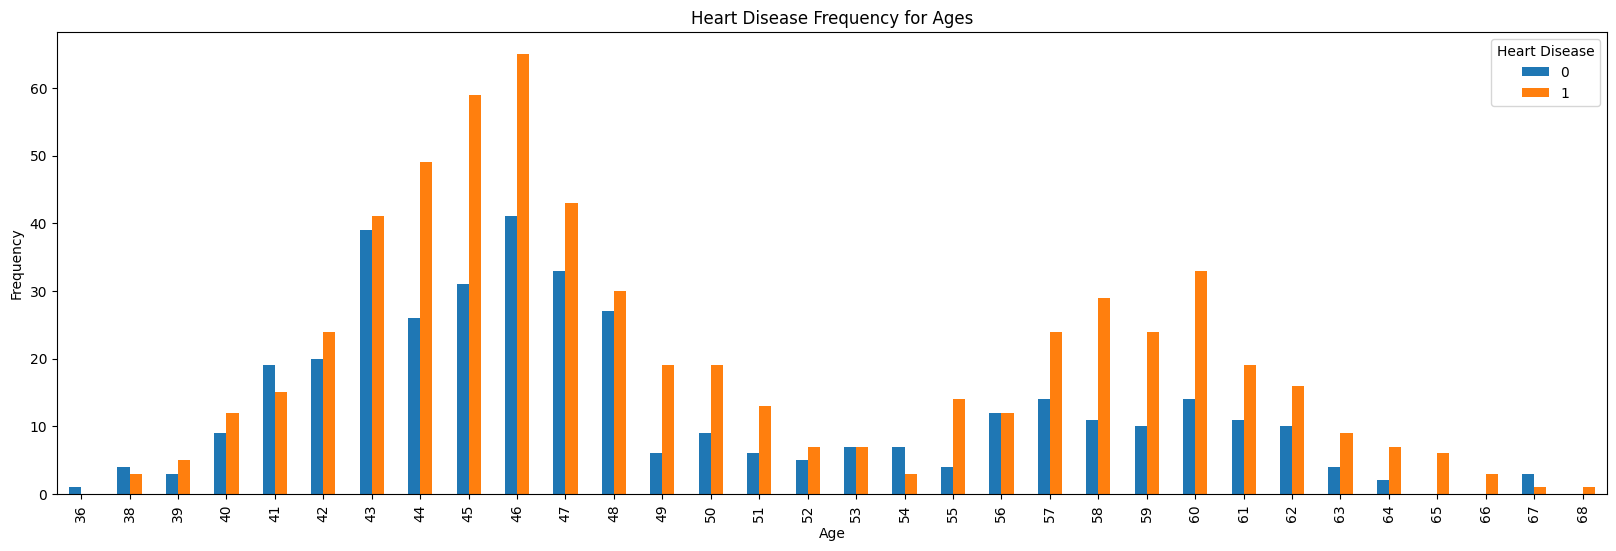

In [125]:
pd.crosstab(synthetic_data_TVAE['Age'],synthetic_data_TVAE['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

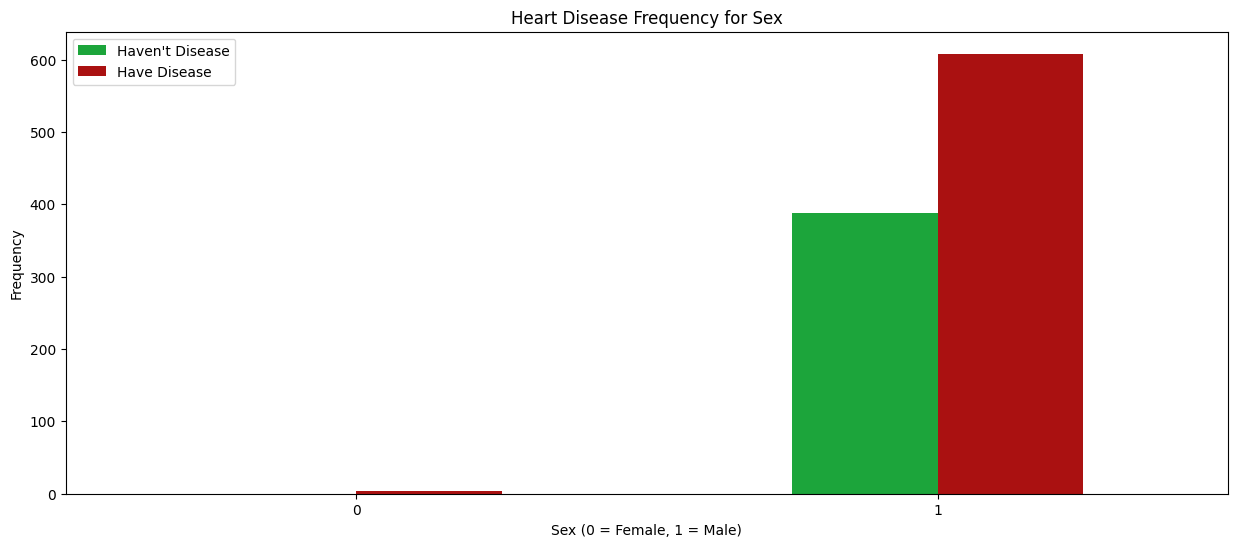

In [126]:
pd.crosstab(synthetic_data_TVAE['Sex'],synthetic_data_TVAE['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

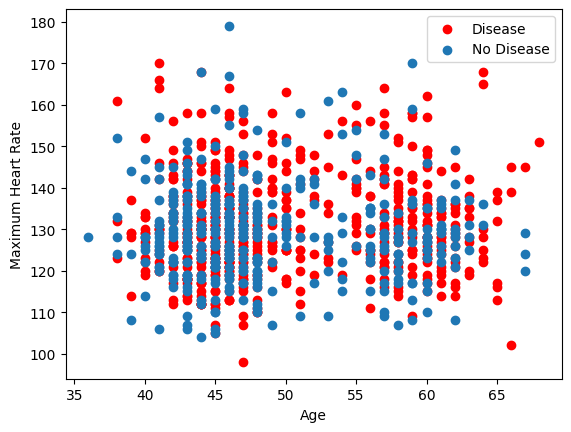

In [127]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_TVAE.Age[synthetic_data_TVAE['Heart Disease']==1], 
            y=synthetic_data_TVAE['Max HR'][synthetic_data_TVAE['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_TVAE.Age[synthetic_data_TVAE['Heart Disease']==0], 
            y=synthetic_data_TVAE['Max HR'][synthetic_data_TVAE['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


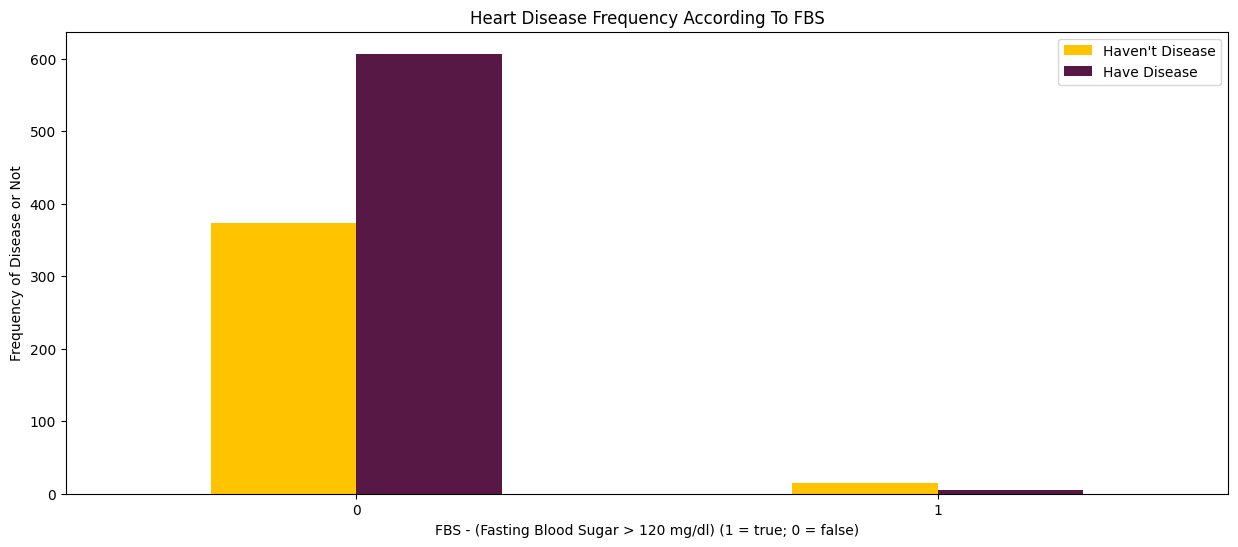

In [128]:
pd.crosstab(synthetic_data_TVAE['FBS over 120'],synthetic_data_TVAE['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

FAST ML

In [129]:
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

# Step 3: Define the metadata
# This is an example of how metadata can be defined based on the types of columns you have.
# Replace it with the actual details of your dataset.
# Metadata dictionary for the dataset
# Define the metadata for your dataset
metadata.detect_from_dataframe(df_hr_disease)

# Create the CTGAN instance with the specified metadata
FASTML = SingleTablePreset(metadata=metadata, name='FAST_ML')

# Fit the CTGAN model to your data
FASTML.fit(df_hr_disease)

# Sample synthetic data
synthetic_data_FASTML= FASTML.sample(1000)

# Display the head of the synthetic dataset
print(synthetic_data_FASTML.head())

   Age  Sex   BP  Cholesterol  FBS over 120  EKG results  Max HR  \
0   47    1  137          282             0            0     157   
1   51    1  134          269             0            0     139   
2   50    1  140          215             0            0     167   
3   58    1  126          277             0            0     134   
4   48    1  130          275             0            0     202   

   Exercise angina  ST depression  Number of vessels fluro  ...  cp_1  cp_2  \
0                0       2.130912                        1  ...     0     0   
1                0       0.148826                        0  ...     0     0   
2                0       1.015074                        0  ...     0     0   
3                1       3.264483                        1  ...     0     0   
4                0       0.000000                        2  ...     0     0   

   cp_3  cp_4  thal_3  thal_6  thal_7  slope_1  slope_2  slope_3  
0     0     1       0       0       1        0   

In [130]:
synthetic_data_FASTML.head()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,47,1,137,282,0,0,157,0,2.130912,1,...,0,0,0,1,0,0,1,0,1,0
1,51,1,134,269,0,0,139,0,0.148826,0,...,0,0,0,1,0,0,1,1,0,0
2,50,1,140,215,0,0,167,0,1.015074,0,...,0,0,0,0,0,0,1,1,0,0
3,58,1,126,277,0,0,134,1,3.264483,1,...,0,0,0,1,0,0,1,0,1,0
4,48,1,130,275,0,0,202,0,0.000000,2,...,0,0,0,0,1,0,0,1,0,0


In [131]:
synthetic_data_FASTML['Heart Disease'].value_counts()

Heart Disease
0    571
1    429
Name: count, dtype: int64

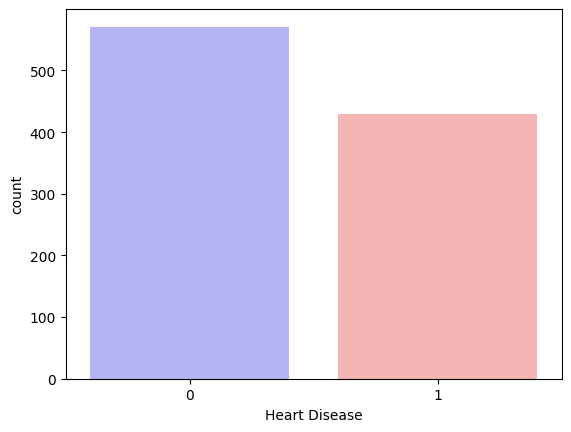

In [132]:
sns.countplot(x="Heart Disease", data=synthetic_data_FASTML, palette="bwr")
plt.show()

In [133]:
percentage_presence = (synthetic_data_FASTML['Heart Disease'] == 1).mean() * 100
percentage_absence = (synthetic_data_FASTML['Heart Disease'] == 0).mean() * 100
print(f"Percentage of patients with heart disease: {percentage_presence:.2f}%")
print(f"Percentage of patients without heart disease: {percentage_absence:.2f}%")


Percentage of patients with heart disease: 42.90%
Percentage of patients without heart disease: 57.10%


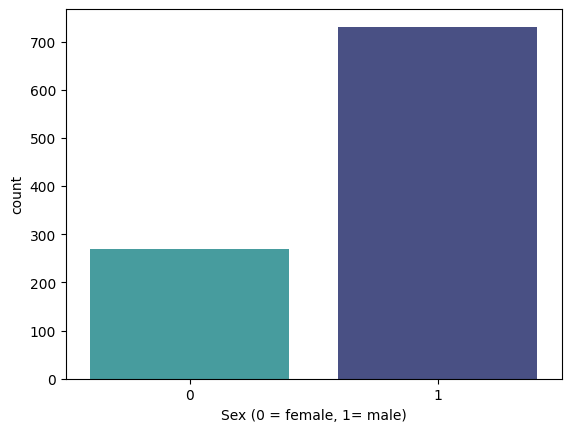

In [134]:
sns.countplot(x='Sex', data=synthetic_data_FASTML, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [135]:
countFemale = len(synthetic_data_FASTML[synthetic_data_FASTML.Sex == 0])
countMale = len(synthetic_data_FASTML[synthetic_data_FASTML.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(synthetic_data_FASTML.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(synthetic_data_FASTML.Sex))*100)))

Percentage of Female Patients: 26.90%
Percentage of Male Patients: 73.10%


In [136]:
synthetic_data_FASTML.groupby('Heart Disease').mean()

,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
Heart Disease,,,,,,,,,,,,,,,,,,,,
0,53.089317,0.672504,129.765324,244.015762,0.106830,0.903678,154.134851,0.175131,0.982975,0.56042,0.089317,0.131349,0.241681,0.348511,0.704028,0.070053,0.257443,0.513135,0.381786,0.059545
1,55.531469,0.808858,135.144522,253.449883,0.102564,1.123543,142.869464,0.347319,1.626018,0.62704,0.090909,0.107226,0.170163,0.592075,0.482517,0.086247,0.470862,0.319347,0.522145,0.072261


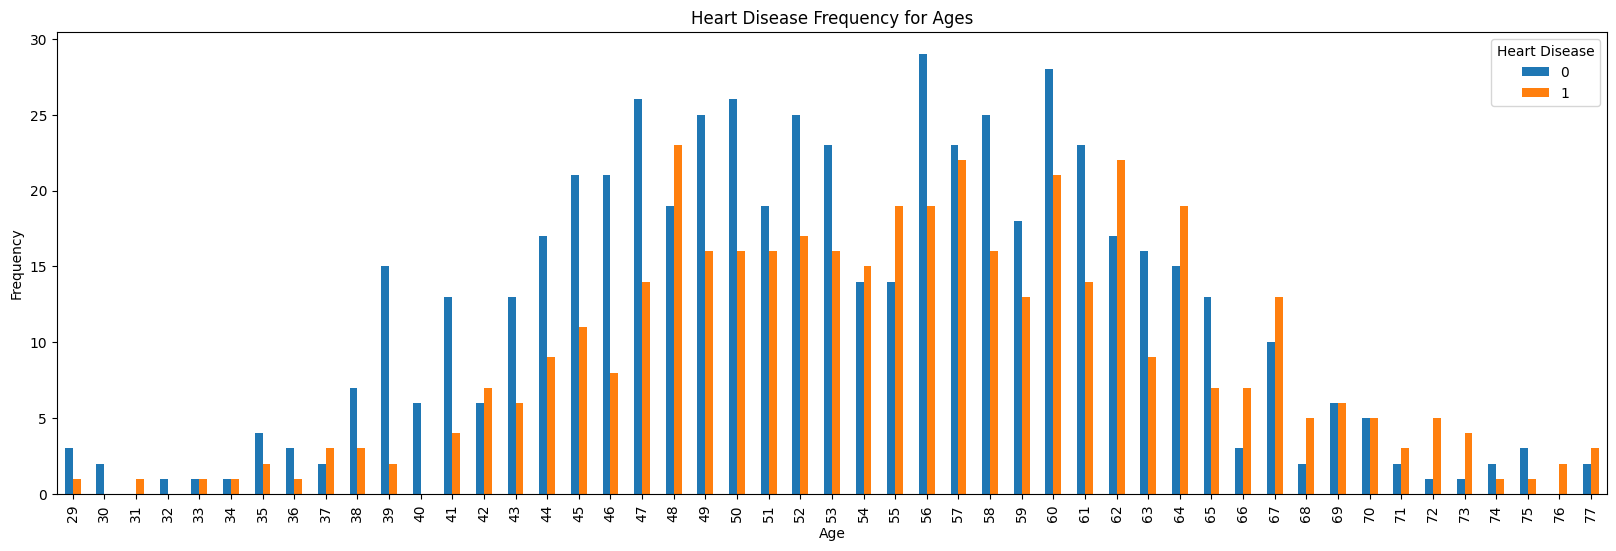

In [137]:
pd.crosstab(synthetic_data_FASTML['Age'],synthetic_data_FASTML['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

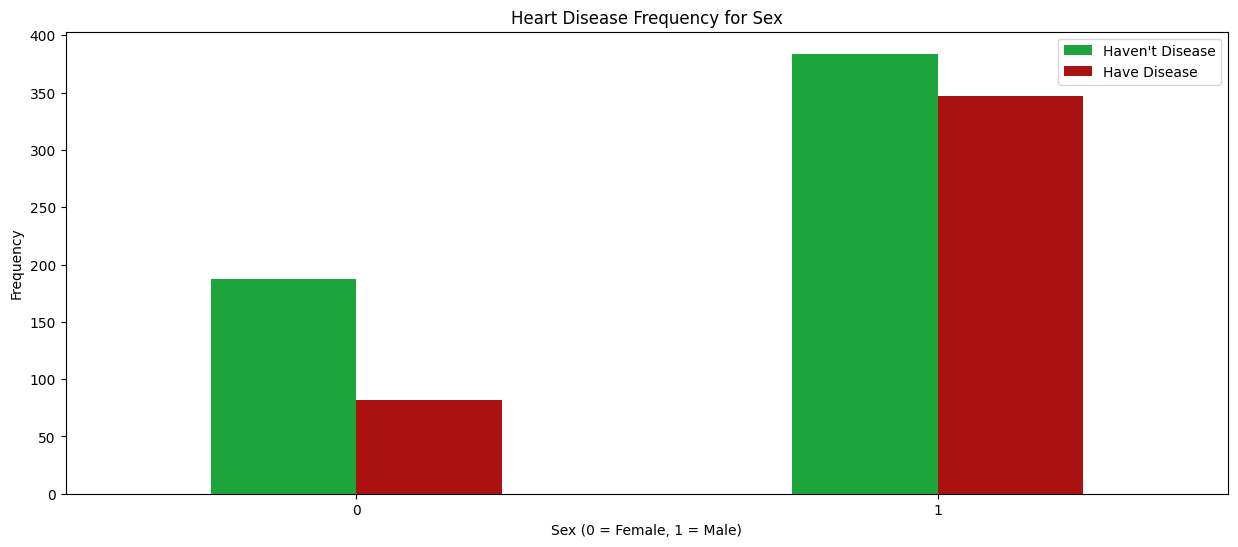

In [138]:
pd.crosstab(synthetic_data_FASTML['Sex'],synthetic_data_FASTML['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

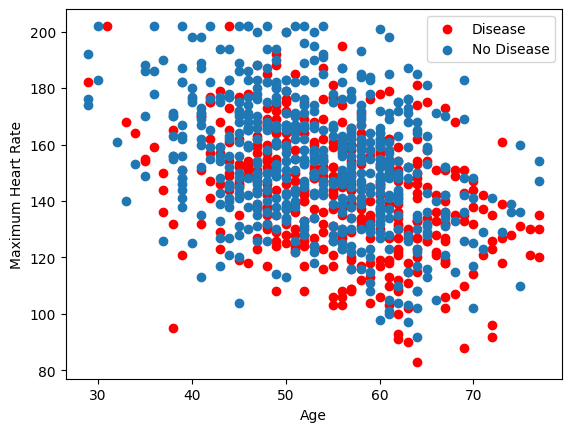

In [139]:
# Assuming df is your DataFrame and it has been correctly loaded.
# Replace df with the name of your DataFrame variable if it's different.

plt.scatter(x=synthetic_data_FASTML.Age[synthetic_data_FASTML['Heart Disease']==1], 
            y=synthetic_data_FASTML['Max HR'][synthetic_data_FASTML['Heart Disease']==1], c="red")
plt.scatter(x=synthetic_data_FASTML.Age[synthetic_data_FASTML['Heart Disease']==0], 
            y=synthetic_data_FASTML['Max HR'][synthetic_data_FASTML['Heart Disease']==0])

plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


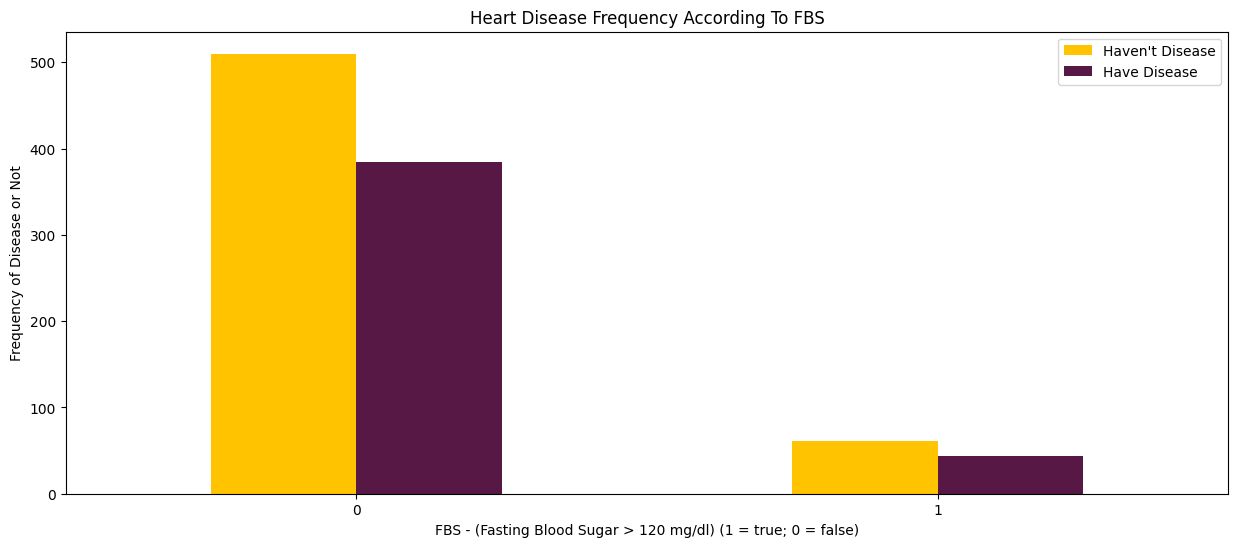

In [140]:
pd.crosstab(synthetic_data_FASTML['FBS over 120'],synthetic_data_FASTML['Heart Disease']).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Training classifers with Synthetic data test with real data

In [151]:
y_train = final_balanced_synthetic_data['Heart Disease'].values
x_data_train = final_balanced_synthetic_data.drop(['Heart Disease'], axis = 1)
X_train = (x_data_train - x_data_train.min()) / (x_data_train.max() - x_data_train.min())

In [152]:
print("Features shape:", X_train.shape)
print("Labels shape:", y_train.shape)

# Ensure that the number of features and labels match
assert X_train.shape[0] == y_train.shape[0], "Mismatch in number of samples between X and y!"


Features shape: (4766, 20)
Labels shape: (4766,)


In [153]:
y_test = df_hr_disease['Heart Disease'].values
x_data_test = df_hr_disease.drop(['Heart Disease'], axis = 1)
X_test = (x_data - x_data.min()) / (x_data.max() - x_data.min())

In [154]:
print("Features shape:", X_test.shape)
print("Labels shape:", y_test.shape)

# Ensure that the number of features and labels match
assert X_test.shape[0] == y_test.shape[0], "Mismatch in number of samples between X and y!"


Features shape: (270, 20)
Labels shape: (270,)


In [155]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
import numpy as np



# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42) #solver='liblinear'
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    'XGBoost': xgb,  # Uncomment or edit according to your need
    'Naive Bayes': gnb
}

# Perform cross-validation for each classifier using the training and validation sets
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Lists to store metrics for each fold
    accuracy_scores = []
    auc_scores = []
    sensitivity_scores = []
    specificity_scores = []
    
    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Fit the model
        clf.fit(X_train_fold, y_train_fold)
        
        # Predict probabilities if the classifier supports it, else use class predictions
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_val_fold)[:, 1]
            auc = roc_auc_score(y_val_fold, y_pred_proba)
        else:
            y_pred_proba = clf.predict(X_val_fold)
            auc = roc_auc_score(y_val_fold, y_pred_proba)
        
        # Predict class labels
        y_pred = clf.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred)
        sensitivity = recall_score(y_val_fold, y_pred)
        
        # Specificity calculation
        tn, fp, fn, tp = confusion_matrix(y_val_fold, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Append metrics to the lists
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
    
    # Calculate mean metrics
    mean_accuracy = np.mean(accuracy_scores)
    mean_auc = np.mean(auc_scores)
    mean_sensitivity = np.mean(sensitivity_scores)
    mean_specificity = np.mean(specificity_scores)
    
    # Print the results for the classifier
    print(f"Accuracy: {mean_accuracy:.4f}, AUC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}\n")

# Final Evaluation with the Test Set
# Choose the best model or ensemble them based on validation set performance, then finally evaluate on the unseen test set
# Example with one classifier
best_model = logreg  # replace with your chosen model
best_model.fit(X_train, y_train)  # Train on the entire training set

# Predict on test set
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.predict(X_test)

# Calculate final metrics
final_accuracy = accuracy_score(y_test, y_pred_test)
final_auc = roc_auc_score(y_test, y_pred_proba_test)
final_sensitivity = recall_score(y_test, y_pred_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
final_specificity = tn / (tn + fp)

# Print final results
print("Final Test Set Results")
print(f"Accuracy: {final_accuracy:.4f}, AUC: {final_auc:.4f}, Sensitivity: {final_sensitivity:.4f}, Specificity: {final_specificity:.4f}")


Results for Logistic Regression:
Accuracy: 0.6805, AUC: 0.7520, Sensitivity: 0.6706, Specificity: 0.6903

Results for SVM:
Accuracy: 0.6706, AUC: 0.7294, Sensitivity: 0.6613, Specificity: 0.6798

Results for Decision Tree:
Accuracy: 0.5984, AUC: 0.5984, Sensitivity: 0.5984, Specificity: 0.5984

Results for KNN:
Accuracy: 0.6259, AUC: 0.6683, Sensitivity: 0.6093, Specificity: 0.6425

Results for Random Forest:
Accuracy: 0.6662, AUC: 0.7285, Sensitivity: 0.6609, Specificity: 0.6714

Results for XGBoost:
Accuracy: 0.6418, AUC: 0.7019, Sensitivity: 0.6408, Specificity: 0.6429

Results for Naive Bayes:
Accuracy: 0.6729, AUC: 0.7355, Sensitivity: 0.6353, Specificity: 0.7104

Final Test Set Results
Accuracy: 0.7778, AUC: 0.9007, Sensitivity: 0.9250, Specificity: 0.6600


In [156]:
import warnings
import numpy as np
import pandas as pd  # Assuming you're using pandas for your data manipulation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from xgboost import XGBClassifier

# To prevent unnecessary warnings from being displayed
warnings.filterwarnings('ignore')

# Initialize classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42) #solver='liblinear',
svm = SVC(probability=True, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
# Uncomment the following line if you have XGBoost installed and want to include it
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'Decision Tree': dtree,
    'KNN': knn,
    'Random Forest': rf,
    'XGBoost': xgb,  # Uncomment this line if including XGBoost
    'Naive Bayes': gnb
}

# Evaluate each classifier directly on the training set and then test on the test set
for name, clf in classifiers.items():
    print(f"Results for {name}:")
    
    # Fit the model on the entire training set (removing the 'Sex' column for training)
    clf.fit(X_train.drop(columns=['Sex']), y_train)
    
    # Predict on the test set
    X_test_modified = X_test.drop(columns=['Sex'])  # Ensure the 'Sex' column is dropped for consistency
    y_pred = clf.predict(X_test_modified)
    
    # Calculate overall metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test_modified)[:, 1]) if hasattr(clf, "predict_proba") else "N/A"
    
    # Print the overall results for the classifier
    print(f"Overall - Accuracy: {accuracy:.4f}, AUC: {auc}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    
    # Split the test set by gender
    X_test_male = X_test[X_test['Sex'] == 1]
    y_test_male = y_test[X_test['Sex'] == 1]
    X_test_female = X_test[X_test['Sex'] == 0]
    y_test_female = y_test[X_test['Sex'] == 0]
    
    # Make predictions for each gender
    y_pred_male = clf.predict(X_test_male.drop(columns=['Sex']))
    y_pred_female = clf.predict(X_test_female.drop(columns=['Sex']))
    
    # Calculate and print gender-specific metrics
    for gender, X_gender, y_gender, y_pred_gender in zip(['Male', 'Female'], [X_test_male, X_test_female], [y_test_male, y_test_female], [y_pred_male, y_pred_female]):
        gender_accuracy = accuracy_score(y_gender, y_pred_gender)
        gender_sensitivity = recall_score(y_gender, y_pred_gender)
        
        # Calculate AUC if the classifier supports probability predictions
        gender_auc = roc_auc_score(y_gender, clf.predict_proba(X_gender.drop(columns=['Sex']))[:, 1]) if hasattr(clf, "predict_proba") else "N/A"
        
        tn_gender, fp_gender, fn_gender, tp_gender = confusion_matrix(y_gender, y_pred_gender).ravel()
        gender_specificity = tn_gender / (tn_gender + fp_gender)
        
        print(f"{gender} - Accuracy: {gender_accuracy:.4f}, AUC: {gender_auc}, Sensitivity: {gender_sensitivity:.4f}, Specificity: {gender_specificity:.4f}")


Results for Logistic Regression:
Overall - Accuracy: 0.7667, AUC: 0.8917222222222222, Sensitivity: 0.8833, Specificity: 0.6733
Male - Accuracy: 0.7650, AUC: 0.8665060240963856, Sensitivity: 0.8800, Specificity: 0.6265
Female - Accuracy: 0.7701, AUC: 0.9335820895522389, Sensitivity: 0.9000, Specificity: 0.7313
Results for SVM:


Overall - Accuracy: 0.8148, AUC: 0.8705555555555555, Sensitivity: 0.8167, Specificity: 0.8133
Male - Accuracy: 0.7760, AUC: 0.8423493975903613, Sensitivity: 0.8200, Specificity: 0.7229
Female - Accuracy: 0.8966, AUC: 0.9216417910447761, Sensitivity: 0.8000, Specificity: 0.9254
Results for Decision Tree:
Overall - Accuracy: 0.5963, AUC: 0.6, Sensitivity: 0.6333, Specificity: 0.5667
Male - Accuracy: 0.6120, AUC: 0.6071084337349397, Sensitivity: 0.6600, Specificity: 0.5542
Female - Accuracy: 0.5632, AUC: 0.5410447761194029, Sensitivity: 0.5000, Specificity: 0.5821
Results for KNN:
Overall - Accuracy: 0.7704, AUC: 0.8018333333333334, Sensitivity: 0.7333, Specificity: 0.8000
Male - Accuracy: 0.7268, AUC: 0.7712650602409638, Sensitivity: 0.7100, Specificity: 0.7470
Female - Accuracy: 0.8621, AUC: 0.8708955223880597, Sensitivity: 0.8500, Specificity: 0.8657
Results for Random Forest:
Overall - Accuracy: 0.7667, AUC: 0.854388888888889, Sensitivity: 0.8250, Specificity: 0.7200
Male - Accuracy: 

Results

Original Dataset
df_hr_disease

Results for Logistic Regression:
Accuracy: 0.8407, AUC: 0.9036, Sensitivity: 0.8083, Specificity: 0.8667

Results for SVM:
Accuracy: 0.8037, AUC: 0.8919, Sensitivity: 0.7500, Specificity: 0.8467

Results for Decision Tree:
Accuracy: 0.7111, AUC: 0.7083, Sensitivity: 0.6833, Specificity: 0.7333

Results for KNN:
Accuracy: 0.8185, AUC: 0.8610, Sensitivity: 0.8083, Specificity: 0.8267

Results for Random Forest:
Accuracy: 0.8148, AUC: 0.8839, Sensitivity: 0.7500, Specificity: 0.8667

Results for XGBoost:
Accuracy: 0.7963, AUC: 0.8558, Sensitivity: 0.7417, Specificity: 0.8400

Results for Naive Bayes:
Accuracy: 0.8333, AUC: 0.8842, Sensitivity: 0.8083, Specificity: 0.8533

Results for Logistic Regression:
Overall - Accuracy: 0.8407, AUC: 0.8947, Sensitivity: 0.8167, Specificity: 0.8600
Male - Accuracy: 0.8169, AUC: 0.8670, Sensitivity: 0.8211, Specificity: 0.8105
Female - Accuracy: 0.9062, AUC: 0.9448, Sensitivity: 0.8200, Specificity: 0.9361
Results for SVM:
Overall - Accuracy: 0.8259, AUC: 0.8892, Sensitivity: 0.7917, Specificity: 0.8533
Male - Accuracy: 0.7887, AUC: 0.8536, Sensitivity: 0.7816, Specificity: 0.7931
Female - Accuracy: 0.9216, AUC: 0.9570, Sensitivity: 0.8867, Specificity: 0.9361
Results for Decision Tree:
Overall - Accuracy: 0.7222, AUC: 0.7183, Sensitivity: 0.6833, Specificity: 0.7533
Male - Accuracy: 0.7122, AUC: 0.7156, Sensitivity: 0.6709, Specificity: 0.7603
Female - Accuracy: 0.7273, AUC: 0.7408, Sensitivity: 0.7433, Specificity: 0.7383
Results for KNN:
Overall - Accuracy: 0.8148, AUC: 0.8282, Sensitivity: 0.7833, Specificity: 0.8400
Male - Accuracy: 0.7793, AUC: 0.8058, Sensitivity: 0.7824, Specificity: 0.7770
Female - Accuracy: 0.9082, AUC: 0.8844, Sensitivity: 0.7867, Specificity: 0.9361
Results for Random Forest:
Overall - Accuracy: 0.7889, AUC: 0.8703, Sensitivity: 0.7167, Specificity: 0.8467
Male - Accuracy: 0.7520, AUC: 0.8451, Sensitivity: 0.7203, Specificity: 0.7847
Female - Accuracy: 0.8812, AUC: 0.9179, Sensitivity: 0.7200, Specificity: 0.9331
Results for XGBoost:
Overall - Accuracy: 0.7852, AUC: 0.8411, Sensitivity: 0.7417, Specificity: 0.8200
Male - Accuracy: 0.7647, AUC: 0.8258, Sensitivity: 0.7514, Specificity: 0.7670
Female - Accuracy: 0.8540, AUC: 0.8855, Sensitivity: 0.6700, Specificity: 0.9015
Results for Naive Bayes:
Overall - Accuracy: 0.8111, AUC: 0.8786, Sensitivity: 0.8083, Specificity: 0.8133
Male - Accuracy: 0.7981, AUC: 0.8356, Sensitivity: 0.8002, Specificity: 0.7903
Female - Accuracy: 0.8517, AUC: 0.9523, Sensitivity: 0.8867, Specificity: 0.8500


CTGAN
synthetic_data_ctgan

Results for Logistic Regression:
Accuracy: 0.5260, AUC: 0.5161, Sensitivity: 0.3289, Specificity: 0.6892

Results for SVM:
Accuracy: 0.5380, AUC: 0.5197, Sensitivity: 0.3288, Specificity: 0.7110

Results for Decision Tree:
Accuracy: 0.5120, AUC: 0.5082, Sensitivity: 0.4679, Specificity: 0.5484

Results for KNN:
Accuracy: 0.5020, AUC: 0.4983, Sensitivity: 0.4084, Specificity: 0.5794

Results for Random Forest:
Accuracy: 0.5310, AUC: 0.5254, Sensitivity: 0.3223, Specificity: 0.7037

Results for XGBoost:
Accuracy: 0.5200, AUC: 0.5233, Sensitivity: 0.4128, Specificity: 0.6087

Results for Naive Bayes:
Accuracy: 0.5400, AUC: 0.5283, Sensitivity: 0.3575, Specificity: 0.6910

Final Test Set Results
Accuracy: 0.6333, AUC: 0.6841, Sensitivity: 0.4917, Specificity: 0.7467

Results for Logistic Regression:
Overall - Accuracy: 0.7148, AUC: 0.7315555555555556, Sensitivity: 0.6083, Specificity: 0.8000
Male - Accuracy: 0.6776, AUC: 0.7056626506024096, Sensitivity: 0.6200, Specificity: 0.7470
Female - Accuracy: 0.7931, AUC: 0.7156716417910448, Sensitivity: 0.5500, Specificity: 0.8657
Results for SVM:
Overall - Accuracy: 0.7222, AUC: 0.8066111111111111, Sensitivity: 0.5333, Specificity: 0.8733
Male - Accuracy: 0.6721, AUC: 0.7608433734939758, Sensitivity: 0.5600, Specificity: 0.8072
Female - Accuracy: 0.8276, AUC: 0.8582089552238805, Sensitivity: 0.4000, Specificity: 0.9552
Results for Decision Tree:
Overall - Accuracy: 0.5481, AUC: 0.5483333333333333, Sensitivity: 0.5500, Specificity: 0.5467
Male - Accuracy: 0.5246, AUC: 0.5219879518072289, Sensitivity: 0.5500, Specificity: 0.4940
Female - Accuracy: 0.5977, AUC: 0.5809701492537314, Sensitivity: 0.5500, Specificity: 0.6119
Results for KNN:
Overall - Accuracy: 0.5444, AUC: 0.52725, Sensitivity: 0.2917, Specificity: 0.7467
Male - Accuracy: 0.4973, AUC: 0.5281927710843373, Sensitivity: 0.3200, Specificity: 0.7108
Female - Accuracy: 0.6437, AUC: 0.48619402985074633, Sensitivity: 0.1500, Specificity: 0.7910
Results for Random Forest:
Overall - Accuracy: 0.5667, AUC: 0.5954722222222223, Sensitivity: 0.4583, Specificity: 0.6533
Male - Accuracy: 0.5574, AUC: 0.5806024096385544, Sensitivity: 0.4900, Specificity: 0.6386
Female - Accuracy: 0.5862, AUC: 0.5694029850746269, Sensitivity: 0.3000, Specificity: 0.6716
Results for XGBoost:
Overall - Accuracy: 0.6074, AUC: 0.6349444444444444, Sensitivity: 0.5583, Specificity: 0.6467
Male - Accuracy: 0.5902, AUC: 0.6120481927710844, Sensitivity: 0.5800, Specificity: 0.6024
Female - Accuracy: 0.6437, AUC: 0.6261194029850747, Sensitivity: 0.4500, Specificity: 0.7015
Results for Naive Bayes:
Overall - Accuracy: 0.7074, AUC: 0.7436111111111111, Sensitivity: 0.6750, Specificity: 0.7333
Male - Accuracy: 0.6831, AUC: 0.7262650602409638, Sensitivity: 0.6800, Specificity: 0.6867
Female - Accuracy: 0.7586, AUC: 0.7291044776119402, Sensitivity: 0.6500, Specificity: 0.7910

Gaussian Coupola 1000 samples
synthetic_data_coupGauss

Results for Logistic Regression:
Accuracy: 0.6980, AUC: 0.7389, Sensitivity: 0.5621, Specificity: 0.7955

Results for SVM:
Accuracy: 0.6680, AUC: 0.7092, Sensitivity: 0.4713, Specificity: 0.8093

Results for Decision Tree:
Accuracy: 0.5480, AUC: 0.5369, Sensitivity: 0.4689, Specificity: 0.6049

Results for KNN:
Accuracy: 0.6230, AUC: 0.6489, Sensitivity: 0.4666, Specificity: 0.7355

Results for Random Forest:
Accuracy: 0.6600, AUC: 0.6985, Sensitivity: 0.4783, Specificity: 0.7905

Results for XGBoost:
Accuracy: 0.6210, AUC: 0.6462, Sensitivity: 0.4952, Specificity: 0.7114

Results for Naive Bayes:
Accuracy: 0.6860, AUC: 0.7240, Sensitivity: 0.5574, Specificity: 0.7784

Final Test Set Results
Accuracy: 0.8222, AUC: 0.9029, Sensitivity: 0.8583, Specificity: 0.7933

Results for Logistic Regression:
Overall - Accuracy: 0.8222, AUC: 0.8942222222222221, Sensitivity: 0.8250, Specificity: 0.8200
Male - Accuracy: 0.7923, AUC: 0.8660240963855421, Sensitivity: 0.8200, Specificity: 0.7590
Female - Accuracy: 0.8851, AUC: 0.9425373134328359, Sensitivity: 0.8500, Specificity: 0.8955
Results for SVM:
Overall - Accuracy: 0.8222, AUC: 0.8883333333333332, Sensitivity: 0.7333, Specificity: 0.8933
Male - Accuracy: 0.7869, AUC: 0.8649397590361445, Sensitivity: 0.7500, Specificity: 0.8313
Female - Accuracy: 0.8966, AUC: 0.9171641791044775, Sensitivity: 0.6500, Specificity: 0.9701
Results for Decision Tree:
Overall - Accuracy: 0.6037, AUC: 0.5958333333333334, Sensitivity: 0.5250, Specificity: 0.6667
Male - Accuracy: 0.5956, AUC: 0.6043975903614458, Sensitivity: 0.5100, Specificity: 0.6988
Female - Accuracy: 0.6207, AUC: 0.6134328358208956, Sensitivity: 0.6000, Specificity: 0.6269
Results for KNN:
Overall - Accuracy: 0.7963, AUC: 0.8113055555555555, Sensitivity: 0.6917, Specificity: 0.8800
Male - Accuracy: 0.7486, AUC: 0.7713855421686746, Sensitivity: 0.7100, Specificity: 0.7952
Female - Accuracy: 0.8966, AUC: 0.8559701492537313, Sensitivity: 0.6000, Specificity: 0.9851
Results for Random Forest:
Overall - Accuracy: 0.7741, AUC: 0.8661944444444445, Sensitivity: 0.7417, Specificity: 0.8000
Male - Accuracy: 0.7486, AUC: 0.8434939759036145, Sensitivity: 0.7500, Specificity: 0.7470
Female - Accuracy: 0.8276, AUC: 0.9138059701492537, Sensitivity: 0.7000, Specificity: 0.8657
Results for XGBoost:
Overall - Accuracy: 0.7519, AUC: 0.8422222222222222, Sensitivity: 0.7333, Specificity: 0.7667
Male - Accuracy: 0.7322, AUC: 0.813855421686747, Sensitivity: 0.7200, Specificity: 0.7470
Female - Accuracy: 0.7931, AUC: 0.905223880597015, Sensitivity: 0.8000, Specificity: 0.7910
Results for Naive Bayes:
Overall - Accuracy: 0.5889, AUC: 0.7557777777777778, Sensitivity: 0.9167, Specificity: 0.3267
Male - Accuracy: 0.6339, AUC: 0.7263855421686747, Sensitivity: 0.9000, Specificity: 0.3133
Female - Accuracy: 0.4943, AUC: 0.8768656716417911, Sensitivity: 1.0000, Specificity: 0.3433

Gaussian Coupola 10 000 samples

Results for Logistic Regression:
Accuracy: 0.6938, AUC: 0.7510, Sensitivity: 0.5586, Specificity: 0.7927

Results for SVM:
Accuracy: 0.6836, AUC: 0.7333, Sensitivity: 0.5316, Specificity: 0.7948

Results for Decision Tree:
Accuracy: 0.6005, AUC: 0.5920, Sensitivity: 0.5375, Specificity: 0.6466

Results for KNN:
Accuracy: 0.6374, AUC: 0.6605, Sensitivity: 0.5278, Specificity: 0.7176

Results for Random Forest:
Accuracy: 0.6767, AUC: 0.7282, Sensitivity: 0.5380, Specificity: 0.7782

Results for XGBoost:
Accuracy: 0.6606, AUC: 0.7073, Sensitivity: 0.5534, Specificity: 0.7390

Results for Naive Bayes:
Accuracy: 0.6783, AUC: 0.7354, Sensitivity: 0.5832, Specificity: 0.7479

Final Test Set Results
Accuracy: 0.8148, AUC: 0.9039, Sensitivity: 0.8667, Specificity: 0.7733

Results for Logistic Regression:
Overall - Accuracy: 0.7926, AUC: 0.894, Sensitivity: 0.8500, Specificity: 0.7467
Male - Accuracy: 0.7760, AUC: 0.869879518072289, Sensitivity: 0.8400, Specificity: 0.6988
Female - Accuracy: 0.8276, AUC: 0.935820895522388, Sensitivity: 0.9000, Specificity: 0.8060
Results for SVM:
Overall - Accuracy: 0.8185, AUC: 0.8808333333333332, Sensitivity: 0.7417, Specificity: 0.8800
Male - Accuracy: 0.7814, AUC: 0.846987951807229, Sensitivity: 0.7400, Specificity: 0.8313
Female - Accuracy: 0.8966, AUC: 0.9440298507462687, Sensitivity: 0.7500, Specificity: 0.9403
Results for Decision Tree:
Overall - Accuracy: 0.6481, AUC: 0.6533333333333333, Sensitivity: 0.7000, Specificity: 0.6067
Male - Accuracy: 0.6448, AUC: 0.6381325301204819, Sensitivity: 0.7100, Specificity: 0.5663
Female - Accuracy: 0.6552, AUC: 0.6533582089552239, Sensitivity: 0.6500, Specificity: 0.6567
Results for KNN:
Overall - Accuracy: 0.7333, AUC: 0.7858333333333334, Sensitivity: 0.6500, Specificity: 0.8000
Male - Accuracy: 0.6885, AUC: 0.7586144578313253, Sensitivity: 0.6700, Specificity: 0.7108
Female - Accuracy: 0.8276, AUC: 0.8208955223880597, Sensitivity: 0.5500, Specificity: 0.9104
Results for Random Forest:
Overall - Accuracy: 0.7778, AUC: 0.84475, Sensitivity: 0.7417, Specificity: 0.8067
Male - Accuracy: 0.7486, AUC: 0.8303012048192772, Sensitivity: 0.7500, Specificity: 0.7470
Female - Accuracy: 0.8391, AUC: 0.8518656716417911, Sensitivity: 0.7000, Specificity: 0.8806
Results for XGBoost:
Overall - Accuracy: 0.7370, AUC: 0.8105555555555556, Sensitivity: 0.7833, Specificity: 0.7000
Male - Accuracy: 0.7432, AUC: 0.7909638554216869, Sensitivity: 0.8000, Specificity: 0.6747
Female - Accuracy: 0.7241, AUC: 0.8238805970149254, Sensitivity: 0.7000, Specificity: 0.7313
Results for Naive Bayes:
Overall - Accuracy: 0.5593, AUC: 0.7462777777777778, Sensitivity: 0.9417, Specificity: 0.2533
Male - Accuracy: 0.6066, AUC: 0.7167469879518072, Sensitivity: 0.9300, Specificity: 0.2169
Female - Accuracy: 0.4598, AUC: 0.8716417910447761, Sensitivity: 1.0000, Specificity: 0.2985

Coupola GAN 
synthetic_data_coupGAN

Results for Logistic Regression:
Accuracy: 0.5520, AUC: 0.5419, Sensitivity: 0.2317, Specificity: 0.7869

Results for SVM:
Accuracy: 0.5690, AUC: 0.5473, Sensitivity: 0.2224, Specificity: 0.8233

Results for Decision Tree:
Accuracy: 0.5280, AUC: 0.5175, Sensitivity: 0.4491, Specificity: 0.5859

Results for KNN:
Accuracy: 0.5250, AUC: 0.5012, Sensitivity: 0.3570, Specificity: 0.6482

Results for Random Forest:
Accuracy: 0.5680, AUC: 0.5422, Sensitivity: 0.2530, Specificity: 0.7990

Results for XGBoost:
Accuracy: 0.5770, AUC: 0.5900, Sensitivity: 0.4469, Specificity: 0.6725

Results for Naive Bayes:
Accuracy: 0.5390, AUC: 0.5326, Sensitivity: 0.2388, Specificity: 0.7592

Final Test Set Results
Accuracy: 0.7074, AUC: 0.8654, Sensitivity: 0.3583, Specificity: 0.9867

Results for Logistic Regression:
Overall - Accuracy: 0.6963, AUC: 0.8641666666666666, Sensitivity: 0.3333, Specificity: 0.9867
Male - Accuracy: 0.6339, AUC: 0.8428915662650602, Sensitivity: 0.3500, Specificity: 0.9759
Female - Accuracy: 0.8276, AUC: 0.9238805970149254, Sensitivity: 0.2500, Specificity: 1.0000
Results for SVM:
Overall - Accuracy: 0.6296, AUC: 0.8062777777777779, Sensitivity: 0.1833, Specificity: 0.9867
Male - Accuracy: 0.5464, AUC: 0.8006024096385541, Sensitivity: 0.1800, Specificity: 0.9880
Female - Accuracy: 0.8046, AUC: 0.8417910447761194, Sensitivity: 0.2000, Specificity: 0.9851
Results for Decision Tree:
Overall - Accuracy: 0.5926, AUC: 0.5783333333333334, Sensitivity: 0.4500, Specificity: 0.7067
Male - Accuracy: 0.5574, AUC: 0.5704216867469879, Sensitivity: 0.4300, Specificity: 0.7108
Female - Accuracy: 0.6667, AUC: 0.6257462686567165, Sensitivity: 0.5500, Specificity: 0.7015
Results for KNN:
Overall - Accuracy: 0.6296, AUC: 0.6474166666666668, Sensitivity: 0.4167, Specificity: 0.8000
Male - Accuracy: 0.5738, AUC: 0.6266265060240963, Sensitivity: 0.4000, Specificity: 0.7831
Female - Accuracy: 0.7471, AUC: 0.6996268656716418, Sensitivity: 0.5000, Specificity: 0.8209
Results for Random Forest:
Overall - Accuracy: 0.6074, AUC: 0.7330277777777778, Sensitivity: 0.1250, Specificity: 0.9933
Male - Accuracy: 0.5191, AUC: 0.7196385542168675, Sensitivity: 0.1200, Specificity: 1.0000
Female - Accuracy: 0.7931, AUC: 0.7354477611940298, Sensitivity: 0.1500, Specificity: 0.9851
Results for XGBoost:
Overall - Accuracy: 0.6000, AUC: 0.6283333333333334, Sensitivity: 0.2500, Specificity: 0.8800
Male - Accuracy: 0.5464, AUC: 0.6119277108433735, Sensitivity: 0.2400, Specificity: 0.9157
Female - Accuracy: 0.7126, AUC: 0.6716417910447761, Sensitivity: 0.3000, Specificity: 0.8358
Results for Naive Bayes:
Overall - Accuracy: 0.6815, AUC: 0.8598333333333333, Sensitivity: 0.3000, Specificity: 0.9867
Male - Accuracy: 0.6066, AUC: 0.8365060240963855, Sensitivity: 0.3000, Specificity: 0.9759
Female - Accuracy: 0.8391, AUC: 0.9298507462686567, Sensitivity: 0.3000, Specificity: 1.0000

TVAE
synthetic_data_TVAE

Results for Logistic Regression:
Accuracy: 0.9620, AUC: 0.7502, Sensitivity: 0.0000, Specificity: 1.0000

Results for SVM:
Accuracy: 0.9620, AUC: 0.7607, Sensitivity: 0.0000, Specificity: 1.0000

Results for Decision Tree:
Accuracy: 0.9300, AUC: 0.6067, Sensitivity: 0.2571, Specificity: 0.9563

Results for KNN:
Accuracy: 0.9590, AUC: 0.5606, Sensitivity: 0.0000, Specificity: 0.9969

Results for Random Forest:
Accuracy: 0.9620, AUC: 0.7391, Sensitivity: 0.0000, Specificity: 1.0000

Results for XGBoost:
Accuracy: 0.9560, AUC: 0.8089, Sensitivity: 0.0571, Specificity: 0.9917

Results for Naive Bayes:
Accuracy: 0.0840, AUC: 0.8055, Sensitivity: 1.0000, Specificity: 0.0478

Final Test Set Results
Accuracy: 0.5556, AUC: 0.5633, Sensitivity: 0.0000, Specificity: 1.0000

Results for Logistic Regression:
Overall - Accuracy: 0.5556, AUC: 0.6522222222222221, Sensitivity: 0.0000, Specificity: 1.0000
Male - Accuracy: 0.4536, AUC: 0.6595180722891567, Sensitivity: 0.0000, Specificity: 1.0000
Female - Accuracy: 0.7701, AUC: 0.6373134328358209, Sensitivity: 0.0000, Specificity: 1.0000
Results for SVM:
Overall - Accuracy: 0.5556, AUC: 0.6070555555555557, Sensitivity: 0.0000, Specificity: 1.0000
Male - Accuracy: 0.4536, AUC: 0.6304819277108434, Sensitivity: 0.0000, Specificity: 1.0000
Female - Accuracy: 0.7701, AUC: 0.6417910447761194, Sensitivity: 0.0000, Specificity: 1.0000
Results for Decision Tree:
Overall - Accuracy: 0.4889, AUC: 0.4483333333333333, Sensitivity: 0.0833, Specificity: 0.8133
Male - Accuracy: 0.4262, AUC: 0.46168674698795187, Sensitivity: 0.0800, Specificity: 0.8434
Female - Accuracy: 0.6207, AUC: 0.4380597014925373, Sensitivity: 0.1000, Specificity: 0.7761
Results for KNN:
Overall - Accuracy: 0.5556, AUC: 0.5358888888888889, Sensitivity: 0.0000, Specificity: 1.0000
Male - Accuracy: 0.4536, AUC: 0.5374698795180722, Sensitivity: 0.0000, Specificity: 1.0000
Female - Accuracy: 0.7701, AUC: 0.5779850746268657, Sensitivity: 0.0000, Specificity: 1.0000
Results for Random Forest:
Overall - Accuracy: 0.5556, AUC: 0.6506944444444445, Sensitivity: 0.0000, Specificity: 1.0000
Male - Accuracy: 0.4536, AUC: 0.6727710843373494, Sensitivity: 0.0000, Specificity: 1.0000
Female - Accuracy: 0.7701, AUC: 0.7007462686567164, Sensitivity: 0.0000, Specificity: 1.0000
Results for XGBoost:
Overall - Accuracy: 0.5556, AUC: 0.6590555555555556, Sensitivity: 0.0000, Specificity: 1.0000
Male - Accuracy: 0.4536, AUC: 0.720843373493976, Sensitivity: 0.0000, Specificity: 1.0000
Female - Accuracy: 0.7701, AUC: 0.6171641791044775, Sensitivity: 0.0000, Specificity: 1.0000
Results for Naive Bayes:
Overall - Accuracy: 0.4296, AUC: 0.43686111111111114, Sensitivity: 0.3583, Specificity: 0.4867
Male - Accuracy: 0.4481, AUC: 0.47789156626506024, Sensitivity: 0.3500, Specificity: 0.5663
Female - Accuracy: 0.3908, AUC: 0.3895522388059701, Sensitivity: 0.4000, Specificity: 0.3881

FAST ML
synthetic_data_FASTML

Results for Logistic Regression:
Accuracy: 0.7080, AUC: 0.7548, Sensitivity: 0.6060, Specificity: 0.7846

Results for SVM:
Accuracy: 0.6650, AUC: 0.7282, Sensitivity: 0.5268, Specificity: 0.7688

Results for Decision Tree:
Accuracy: 0.6000, AUC: 0.5920, Sensitivity: 0.5361, Specificity: 0.6480

Results for KNN:
Accuracy: 0.6440, AUC: 0.6826, Sensitivity: 0.5198, Specificity: 0.7372

Results for Random Forest:
Accuracy: 0.6760, AUC: 0.7299, Sensitivity: 0.5476, Specificity: 0.7723

Results for XGBoost:
Accuracy: 0.6490, AUC: 0.6973, Sensitivity: 0.5593, Specificity: 0.7163

Results for Naive Bayes:
Accuracy: 0.6920, AUC: 0.7483, Sensitivity: 0.6247, Specificity: 0.7425

Final Test Set Results
Accuracy: 0.8148, AUC: 0.9171, Sensitivity: 0.6333, Specificity: 0.9600

Results for Logistic Regression:
Overall - Accuracy: 0.8074, AUC: 0.9104444444444444, Sensitivity: 0.6250, Specificity: 0.9533
Male - Accuracy: 0.7596, AUC: 0.8897590361445784, Sensitivity: 0.6200, Specificity: 0.9277
Female - Accuracy: 0.9080, AUC: 0.941044776119403, Sensitivity: 0.6500, Specificity: 0.9851
Results for SVM:
Overall - Accuracy: 0.8556, AUC: 0.9140277777777777, Sensitivity: 0.7333, Specificity: 0.9533
Male - Accuracy: 0.8251, AUC: 0.8904819277108433, Sensitivity: 0.7300, Specificity: 0.9398
Female - Accuracy: 0.9195, AUC: 0.9477611940298507, Sensitivity: 0.7500, Specificity: 0.9701
Results for Decision Tree:
Overall - Accuracy: 0.6630, AUC: 0.645, Sensitivity: 0.4833, Specificity: 0.8067
Male - Accuracy: 0.6230, AUC: 0.6406626506024097, Sensitivity: 0.4500, Specificity: 0.8313
Female - Accuracy: 0.7471, AUC: 0.7130597014925373, Sensitivity: 0.6500, Specificity: 0.7761
Results for KNN:
Overall - Accuracy: 0.7926, AUC: 0.8612222222222222, Sensitivity: 0.7083, Specificity: 0.8600
Male - Accuracy: 0.7596, AUC: 0.8392168674698794, Sensitivity: 0.7000, Specificity: 0.8313
Female - Accuracy: 0.8621, AUC: 0.9085820895522387, Sensitivity: 0.7500, Specificity: 0.8955
Results for Random Forest:
Overall - Accuracy: 0.7778, AUC: 0.89325, Sensitivity: 0.5500, Specificity: 0.9600
Male - Accuracy: 0.7049, AUC: 0.8663855421686747, Sensitivity: 0.5200, Specificity: 0.9277
Female - Accuracy: 0.9310, AUC: 0.9291044776119403, Sensitivity: 0.7000, Specificity: 1.0000
Results for XGBoost:
Overall - Accuracy: 0.7667, AUC: 0.8506666666666666, Sensitivity: 0.6333, Specificity: 0.8733
Male - Accuracy: 0.7322, AUC: 0.8351807228915662, Sensitivity: 0.6100, Specificity: 0.8795
Female - Accuracy: 0.8391, AUC: 0.9, Sensitivity: 0.7500, Specificity: 0.8657
Results for Naive Bayes:
Overall - Accuracy: 0.8111, AUC: 0.8913333333333333, Sensitivity: 0.7250, Specificity: 0.8800
Male - Accuracy: 0.7650, AUC: 0.8639759036144578, Sensitivity: 0.7000, Specificity: 0.8434
Female - Accuracy: 0.9080, AUC: 0.9335820895522388, Sensitivity: 0.8500, Specificity: 0.9254

Gender equal Gaussian Coupola 1000
balanced_synthetic_data

Results for Logistic Regression:
Accuracy: 0.6933, AUC: 0.7304, Sensitivity: 0.4742, Specificity: 0.8334

Results for SVM:
Accuracy: 0.6683, AUC: 0.6967, Sensitivity: 0.4103, Specificity: 0.8333

Results for Decision Tree:
Accuracy: 0.6183, AUC: 0.5962, Sensitivity: 0.4957, Specificity: 0.6967

Results for KNN:
Accuracy: 0.6517, AUC: 0.6491, Sensitivity: 0.4828, Specificity: 0.7595

Results for Random Forest:
Accuracy: 0.6967, AUC: 0.7337, Sensitivity: 0.5043, Specificity: 0.8197

Results for XGBoost:
Accuracy: 0.6517, AUC: 0.6687, Sensitivity: 0.5042, Specificity: 0.7459

Results for Naive Bayes:
Accuracy: 0.6767, AUC: 0.7100, Sensitivity: 0.5253, Specificity: 0.7732

Final Test Set Results
Accuracy: 0.7963, AUC: 0.8802, Sensitivity: 0.7333, Specificity: 0.8467

Results for Logistic Regression:
Overall - Accuracy: 0.8148, AUC: 0.8693333333333333, Sensitivity: 0.7167, Specificity: 0.8933
Male - Accuracy: 0.7814, AUC: 0.8400000000000001, Sensitivity: 0.7100, Specificity: 0.8675
Female - Accuracy: 0.8851, AUC: 0.9335820895522388, Sensitivity: 0.7500, Specificity: 0.9254
Results for SVM:
Overall - Accuracy: 0.7889, AUC: 0.8727222222222222, Sensitivity: 0.6250, Specificity: 0.9200
Male - Accuracy: 0.7486, AUC: 0.8454216867469879, Sensitivity: 0.6400, Specificity: 0.8795
Female - Accuracy: 0.8736, AUC: 0.914179104477612, Sensitivity: 0.5500, Specificity: 0.9701
Results for Decision Tree:
Overall - Accuracy: 0.6704, AUC: 0.6641666666666666, Sensitivity: 0.6083, Specificity: 0.7200
Male - Accuracy: 0.6503, AUC: 0.6574698795180723, Sensitivity: 0.5800, Specificity: 0.7349
Female - Accuracy: 0.7126, AUC: 0.7257462686567164, Sensitivity: 0.7500, Specificity: 0.7015
Results for KNN:
Overall - Accuracy: 0.7556, AUC: 0.800888888888889, Sensitivity: 0.6500, Specificity: 0.8400
Male - Accuracy: 0.6885, AUC: 0.7481927710843375, Sensitivity: 0.6500, Specificity: 0.7349
Female - Accuracy: 0.8966, AUC: 0.8630597014925373, Sensitivity: 0.6500, Specificity: 0.9701
Results for Random Forest:
Overall - Accuracy: 0.7852, AUC: 0.8542222222222222, Sensitivity: 0.6250, Specificity: 0.9133
Male - Accuracy: 0.7432, AUC: 0.8372289156626507, Sensitivity: 0.6200, Specificity: 0.8916
Female - Accuracy: 0.8736, AUC: 0.8888059701492537, Sensitivity: 0.6500, Specificity: 0.9403
Results for XGBoost:
Overall - Accuracy: 0.7741, AUC: 0.8376666666666666, Sensitivity: 0.7500, Specificity: 0.7933
Male - Accuracy: 0.7705, AUC: 0.8333734939759035, Sensitivity: 0.7300, Specificity: 0.8193
Female - Accuracy: 0.7816, AUC: 0.8582089552238805, Sensitivity: 0.8500, Specificity: 0.7612
Results for Naive Bayes:
Overall - Accuracy: 0.7222, AUC: 0.8510000000000001, Sensitivity: 0.8500, Specificity: 0.6200
Male - Accuracy: 0.7377, AUC: 0.824578313253012, Sensitivity: 0.8400, Specificity: 0.6145
Female - Accuracy: 0.6897, AUC: 0.9223880597014925, Sensitivity: 0.9000, Specificity: 0.6269

Gender equal Gaussian Coupola 10k balnanced_synthetic_data

Results for Logistic Regression:
Accuracy: 0.6977, AUC: 0.7516, Sensitivity: 0.5166, Specificity: 0.8170

Results for SVM:
Accuracy: 0.6882, AUC: 0.7262, Sensitivity: 0.4847, Specificity: 0.8222

Results for Decision Tree:
Accuracy: 0.5895, AUC: 0.5731, Sensitivity: 0.4935, Specificity: 0.6528

Results for KNN:
Accuracy: 0.6443, AUC: 0.6604, Sensitivity: 0.4851, Specificity: 0.7492

Results for Random Forest:
Accuracy: 0.6783, AUC: 0.7267, Sensitivity: 0.4910, Specificity: 0.8018

Results for XGBoost:
Accuracy: 0.6628, AUC: 0.7012, Sensitivity: 0.5187, Specificity: 0.7578

Results for Naive Bayes:
Accuracy: 0.6857, AUC: 0.7363, Sensitivity: 0.5682, Specificity: 0.7631

Final Test Set Results
Accuracy: 0.8074, AUC: 0.8991, Sensitivity: 0.8500, Specificity: 0.7733

Results for Logistic Regression:
Overall - Accuracy: 0.7889, AUC: 0.890277777777778, Sensitivity: 0.8167, Specificity: 0.7667
Male - Accuracy: 0.7596, AUC: 0.8644578313253012, Sensitivity: 0.8100, Specificity: 0.6988
Female - Accuracy: 0.8506, AUC: 0.9343283582089552, Sensitivity: 0.8500, Specificity: 0.8507
Results for SVM:
Overall - Accuracy: 0.8074, AUC: 0.870611111111111, Sensitivity: 0.7250, Specificity: 0.8733
Male - Accuracy: 0.7705, AUC: 0.8337349397590361, Sensitivity: 0.7200, Specificity: 0.8313
Female - Accuracy: 0.8851, AUC: 0.9477611940298507, Sensitivity: 0.7500, Specificity: 0.9254
Results for Decision Tree:
Overall - Accuracy: 0.6519, AUC: 0.6541666666666667, Sensitivity: 0.6750, Specificity: 0.6333
Male - Accuracy: 0.6339, AUC: 0.6312048192771085, Sensitivity: 0.6600, Specificity: 0.6024
Female - Accuracy: 0.6897, AUC: 0.710820895522388, Sensitivity: 0.7500, Specificity: 0.6716
Results for KNN:
Overall - Accuracy: 0.7704, AUC: 0.8005833333333334, Sensitivity: 0.6667, Specificity: 0.8533
Male - Accuracy: 0.7322, AUC: 0.7783132530120481, Sensitivity: 0.6600, Specificity: 0.8193
Female - Accuracy: 0.8506, AUC: 0.8399253731343284, Sensitivity: 0.7000, Specificity: 0.8955
Results for Random Forest:
Overall - Accuracy: 0.8037, AUC: 0.8668888888888888, Sensitivity: 0.7500, Specificity: 0.8467
Male - Accuracy: 0.7705, AUC: 0.8387951807228917, Sensitivity: 0.7400, Specificity: 0.8072
Female - Accuracy: 0.8736, AUC: 0.9156716417910449, Sensitivity: 0.8000, Specificity: 0.8955
Results for XGBoost:
Overall - Accuracy: 0.7630, AUC: 0.8178333333333332, Sensitivity: 0.7583, Specificity: 0.7667
Male - Accuracy: 0.7268, AUC: 0.77, Sensitivity: 0.7400, Specificity: 0.7108
Female - Accuracy: 0.8391, AUC: 0.8947761194029851, Sensitivity: 0.8500, Specificity: 0.8358
Results for Naive Bayes:
Overall - Accuracy: 0.5556, AUC: 0.7272222222222222, Sensitivity: 0.9417, Specificity: 0.2467
Male - Accuracy: 0.5956, AUC: 0.6969277108433735, Sensitivity: 0.9300, Specificity: 0.1928
Female - Accuracy: 0.4713, AUC: 0.8611940298507462, Sensitivity: 1.0000, Specificity: 0.3134

Gender equal disease equal Gaussian Coupola 1000
final_balanced_synthetic_data

Results for Logistic Regression:
Accuracy: 0.6775, AUC: 0.7413, Sensitivity: 0.6455, Specificity: 0.7096

Results for SVM:
Accuracy: 0.6476, AUC: 0.7177, Sensitivity: 0.6156, Specificity: 0.6796

Results for Decision Tree:
Accuracy: 0.6135, AUC: 0.6136, Sensitivity: 0.6031, Specificity: 0.6242

Results for KNN:
Accuracy: 0.6260, AUC: 0.6758, Sensitivity: 0.5986, Specificity: 0.6536

Results for Random Forest:
Accuracy: 0.6623, AUC: 0.7430, Sensitivity: 0.6539, Specificity: 0.6707

Results for XGBoost:
Accuracy: 0.6538, AUC: 0.7113, Sensitivity: 0.6586, Specificity: 0.6495

Results for Naive Bayes:
Accuracy: 0.6539, AUC: 0.7147, Sensitivity: 0.5940, Specificity: 0.7138

Final Test Set Results
Accuracy: 0.7852, AUC: 0.8868, Sensitivity: 0.8667, Specificity: 0.7200

Results for Logistic Regression:
Overall - Accuracy: 0.7852, AUC: 0.875611111111111, Sensitivity: 0.7917, Specificity: 0.7800
Male - Accuracy: 0.7541, AUC: 0.8481927710843372, Sensitivity: 0.7700, Specificity: 0.7349
Female - Accuracy: 0.8506, AUC: 0.9335820895522388, Sensitivity: 0.9000, Specificity: 0.8358
Results for SVM:
Overall - Accuracy: 0.8000, AUC: 0.863888888888889, Sensitivity: 0.7750, Specificity: 0.8200
Male - Accuracy: 0.7760, AUC: 0.8349397590361445, Sensitivity: 0.7800, Specificity: 0.7711
Female - Accuracy: 0.8506, AUC: 0.9156716417910448, Sensitivity: 0.7500, Specificity: 0.8806
Results for Decision Tree:
Overall - Accuracy: 0.6630, AUC: 0.6525, Sensitivity: 0.5583, Specificity: 0.7467
Male - Accuracy: 0.6339, AUC: 0.6414457831325301, Sensitivity: 0.5600, Specificity: 0.7229
Female - Accuracy: 0.7241, AUC: 0.6630597014925373, Sensitivity: 0.5500, Specificity: 0.7761
Results for KNN:
Overall - Accuracy: 0.7296, AUC: 0.8048055555555556, Sensitivity: 0.7500, Specificity: 0.7133
Male - Accuracy: 0.6940, AUC: 0.7610843373493976, Sensitivity: 0.7500, Specificity: 0.6265
Female - Accuracy: 0.8046, AUC: 0.8548507462686566, Sensitivity: 0.7500, Specificity: 0.8209
Results for Random Forest:
Overall - Accuracy: 0.7630, AUC: 0.8483611111111111, Sensitivity: 0.7833, Specificity: 0.7467
Male - Accuracy: 0.7486, AUC: 0.8314457831325301, Sensitivity: 0.7800, Specificity: 0.7108
Female - Accuracy: 0.7931, AUC: 0.876865671641791, Sensitivity: 0.8000, Specificity: 0.7910
Results for XGBoost:
Overall - Accuracy: 0.7370, AUC: 0.8274999999999999, Sensitivity: 0.7750, Specificity: 0.7067
Male - Accuracy: 0.7486, AUC: 0.8233734939759036, Sensitivity: 0.7900, Specificity: 0.6988
Female - Accuracy: 0.7126, AUC: 0.7977611940298507, Sensitivity: 0.7000, Specificity: 0.7164
Results for Naive Bayes:
Overall - Accuracy: 0.7704, AUC: 0.8723888888888889, Sensitivity: 0.8583, Specificity: 0.7000
Male - Accuracy: 0.7760, AUC: 0.8438554216867469, Sensitivity: 0.8500, Specificity: 0.6867
Female - Accuracy: 0.7586, AUC: 0.9350746268656717, Sensitivity: 0.9000, Specificity: 0.7164

Gender equal disease equal Gaussian Coupola 10k
final_balanced_synthetic_data

Results for Logistic Regression:
Accuracy: 0.6805, AUC: 0.7520, Sensitivity: 0.6706, Specificity: 0.6903

Results for SVM:
Accuracy: 0.6706, AUC: 0.7294, Sensitivity: 0.6613, Specificity: 0.6798

Results for Decision Tree:
Accuracy: 0.5984, AUC: 0.5984, Sensitivity: 0.5984, Specificity: 0.5984

Results for KNN:
Accuracy: 0.6259, AUC: 0.6683, Sensitivity: 0.6093, Specificity: 0.6425

Results for Random Forest:
Accuracy: 0.6662, AUC: 0.7285, Sensitivity: 0.6609, Specificity: 0.6714

Results for XGBoost:
Accuracy: 0.6418, AUC: 0.7019, Sensitivity: 0.6408, Specificity: 0.6429

Results for Naive Bayes:
Accuracy: 0.6729, AUC: 0.7355, Sensitivity: 0.6353, Specificity: 0.7104

Final Test Set Results
Accuracy: 0.7778, AUC: 0.9007, Sensitivity: 0.9250, Specificity: 0.6600

Results for Logistic Regression:
Overall - Accuracy: 0.7667, AUC: 0.8917222222222222, Sensitivity: 0.8833, Specificity: 0.6733
Male - Accuracy: 0.7650, AUC: 0.8665060240963856, Sensitivity: 0.8800, Specificity: 0.6265
Female - Accuracy: 0.7701, AUC: 0.9335820895522389, Sensitivity: 0.9000, Specificity: 0.7313
Results for SVM:
Overall - Accuracy: 0.8148, AUC: 0.8705555555555555, Sensitivity: 0.8167, Specificity: 0.8133
Male - Accuracy: 0.7760, AUC: 0.8423493975903613, Sensitivity: 0.8200, Specificity: 0.7229
Female - Accuracy: 0.8966, AUC: 0.9216417910447761, Sensitivity: 0.8000, Specificity: 0.9254
Results for Decision Tree:
Overall - Accuracy: 0.5963, AUC: 0.6, Sensitivity: 0.6333, Specificity: 0.5667
Male - Accuracy: 0.6120, AUC: 0.6071084337349397, Sensitivity: 0.6600, Specificity: 0.5542
Female - Accuracy: 0.5632, AUC: 0.5410447761194029, Sensitivity: 0.5000, Specificity: 0.5821
Results for KNN:
Overall - Accuracy: 0.7704, AUC: 0.8018333333333334, Sensitivity: 0.7333, Specificity: 0.8000
Male - Accuracy: 0.7268, AUC: 0.7712650602409638, Sensitivity: 0.7100, Specificity: 0.7470
Female - Accuracy: 0.8621, AUC: 0.8708955223880597, Sensitivity: 0.8500, Specificity: 0.8657
Results for Random Forest:
Overall - Accuracy: 0.7667, AUC: 0.854388888888889, Sensitivity: 0.8250, Specificity: 0.7200
Male - Accuracy: 0.7377, AUC: 0.8233734939759035, Sensitivity: 0.8200, Specificity: 0.6386
Female - Accuracy: 0.8276, AUC: 0.91455223880597, Sensitivity: 0.8500, Specificity: 0.8209
Results for XGBoost:
Overall - Accuracy: 0.7000, AUC: 0.8051666666666666, Sensitivity: 0.8667, Specificity: 0.5667
Male - Accuracy: 0.6940, AUC: 0.773012048192771, Sensitivity: 0.8600, Specificity: 0.4940
Female - Accuracy: 0.7126, AUC: 0.8597014925373134, Sensitivity: 0.9000, Specificity: 0.6567
Results for Naive Bayes:
Overall - Accuracy: 0.5407, AUC: 0.7200555555555554, Sensitivity: 0.9583, Specificity: 0.2067
Male - Accuracy: 0.6011, AUC: 0.6892168674698795, Sensitivity: 0.9500, Specificity: 0.1807
Female - Accuracy: 0.4138, AUC: 0.8567164179104478, Sensitivity: 1.0000, Specificity: 0.2388

now balanced heart disease frequency per gender of gaussian coupola 1000 
synthetic dataset
balanced_df 

Results for Logistic Regression:
Accuracy: 0.6693, AUC: 0.7220, Sensitivity: 0.6463, Specificity: 0.6934

Results for SVM:
Accuracy: 0.6433, AUC: 0.6973, Sensitivity: 0.6406, Specificity: 0.6468

Results for Decision Tree:
Accuracy: 0.5990, AUC: 0.5993, Sensitivity: 0.5991, Specificity: 0.5995

Results for KNN:
Accuracy: 0.6091, AUC: 0.6476, Sensitivity: 0.5941, Specificity: 0.6251

Results for Random Forest:
Accuracy: 0.6694, AUC: 0.7255, Sensitivity: 0.6565, Specificity: 0.6826

Results for XGBoost:
Accuracy: 0.6200, AUC: 0.6710, Sensitivity: 0.5675, Specificity: 0.6723

Results for Naive Bayes:
Accuracy: 0.6406, AUC: 0.7087, Sensitivity: 0.5838, Specificity: 0.6988

Final Test Set Results
Accuracy: 0.7852, AUC: 0.8718, Sensitivity: 0.7833, Specificity: 0.7867

Results for Logistic Regression:
Overall - Accuracy: 0.7778, AUC: 0.8806111111111111, Sensitivity: 0.7833, Specificity: 0.7733
Male - Accuracy: 0.7596, AUC: 0.849277108433735, Sensitivity: 0.7800, Specificity: 0.7349
Female - Accuracy: 0.8161, AUC: 0.9283582089552239, Sensitivity: 0.8000, Specificity: 0.8209
Results for SVM:
Overall - Accuracy: 0.8000, AUC: 0.8678888888888889, Sensitivity: 0.7750, Specificity: 0.8200
Male - Accuracy: 0.7541, AUC: 0.8414457831325302, Sensitivity: 0.7800, Specificity: 0.7229
Female - Accuracy: 0.8966, AUC: 0.8947761194029851, Sensitivity: 0.7500, Specificity: 0.9403
Results for Decision Tree:
Overall - Accuracy: 0.6926, AUC: 0.6916666666666667, Sensitivity: 0.6833, Specificity: 0.7000
Male - Accuracy: 0.6940, AUC: 0.6913253012048193, Sensitivity: 0.7200, Specificity: 0.6627
Female - Accuracy: 0.6897, AUC: 0.6231343283582089, Sensitivity: 0.5000, Specificity: 0.7463
Results for KNN:
Overall - Accuracy: 0.7481, AUC: 0.8091388888888889, Sensitivity: 0.7333, Specificity: 0.7600
Male - Accuracy: 0.7213, AUC: 0.79144578313253, Sensitivity: 0.7500, Specificity: 0.6867
Female - Accuracy: 0.8046, AUC: 0.8130597014925373, Sensitivity: 0.6500, Specificity: 0.8507
Results for Random Forest:
Overall - Accuracy: 0.7926, AUC: 0.8563333333333334, Sensitivity: 0.8083, Specificity: 0.7800
Male - Accuracy: 0.7923, AUC: 0.8410240963855422, Sensitivity: 0.8200, Specificity: 0.7590
Female - Accuracy: 0.7931, AUC: 0.8567164179104477, Sensitivity: 0.7500, Specificity: 0.8060
Results for XGBoost:
Overall - Accuracy: 0.7333, AUC: 0.8236666666666667, Sensitivity: 0.8000, Specificity: 0.6800
Male - Accuracy: 0.7268, AUC: 0.8120481927710843, Sensitivity: 0.8100, Specificity: 0.6265
Female - Accuracy: 0.7471, AUC: 0.8253731343283582, Sensitivity: 0.7500, Specificity: 0.7463
Results for Naive Bayes:
Overall - Accuracy: 0.7370, AUC: 0.8637222222222223, Sensitivity: 0.9167, Specificity: 0.5933
Male - Accuracy: 0.7596, AUC: 0.8372289156626506, Sensitivity: 0.9100, Specificity: 0.5783
Female - Accuracy: 0.6897, AUC: 0.9164179104477612, Sensitivity: 0.9500, Specificity: 0.6119

now balanced heart disease frequency per gender of gaussian coupola 10k 
synthetic dataset
balanced_df 

Results for Logistic Regression:
Accuracy: 0.6938, AUC: 0.7510, Sensitivity: 0.5586, Specificity: 0.7927

Results for SVM:
Accuracy: 0.6836, AUC: 0.7333, Sensitivity: 0.5316, Specificity: 0.7948

Results for Decision Tree:
Accuracy: 0.6005, AUC: 0.5920, Sensitivity: 0.5375, Specificity: 0.6466

Results for KNN:
Accuracy: 0.6374, AUC: 0.6605, Sensitivity: 0.5278, Specificity: 0.7176

Results for Random Forest:
Accuracy: 0.6767, AUC: 0.7282, Sensitivity: 0.5380, Specificity: 0.7782

Results for XGBoost:
Accuracy: 0.6606, AUC: 0.7073, Sensitivity: 0.5534, Specificity: 0.7390

Results for Naive Bayes:
Accuracy: 0.6783, AUC: 0.7354, Sensitivity: 0.5832, Specificity: 0.7479

Final Test Set Results
Accuracy: 0.8148, AUC: 0.9039, Sensitivity: 0.8667, Specificity: 0.7733

Results for Logistic Regression:
Overall - Accuracy: 0.7926, AUC: 0.894, Sensitivity: 0.8500, Specificity: 0.7467
Male - Accuracy: 0.7760, AUC: 0.869879518072289, Sensitivity: 0.8400, Specificity: 0.6988
Female - Accuracy: 0.8276, AUC: 0.935820895522388, Sensitivity: 0.9000, Specificity: 0.8060
Results for SVM:
Overall - Accuracy: 0.8185, AUC: 0.8808333333333332, Sensitivity: 0.7417, Specificity: 0.8800
Male - Accuracy: 0.7814, AUC: 0.846987951807229, Sensitivity: 0.7400, Specificity: 0.8313
Female - Accuracy: 0.8966, AUC: 0.9440298507462687, Sensitivity: 0.7500, Specificity: 0.9403
Results for Decision Tree:
Overall - Accuracy: 0.6481, AUC: 0.6533333333333333, Sensitivity: 0.7000, Specificity: 0.6067
Male - Accuracy: 0.6448, AUC: 0.6381325301204819, Sensitivity: 0.7100, Specificity: 0.5663
Female - Accuracy: 0.6552, AUC: 0.6533582089552239, Sensitivity: 0.6500, Specificity: 0.6567
Results for KNN:
Overall - Accuracy: 0.7333, AUC: 0.7858333333333334, Sensitivity: 0.6500, Specificity: 0.8000
Male - Accuracy: 0.6885, AUC: 0.7586144578313253, Sensitivity: 0.6700, Specificity: 0.7108
Female - Accuracy: 0.8276, AUC: 0.8208955223880597, Sensitivity: 0.5500, Specificity: 0.9104
Results for Random Forest:
Overall - Accuracy: 0.7778, AUC: 0.84475, Sensitivity: 0.7417, Specificity: 0.8067
Male - Accuracy: 0.7486, AUC: 0.8303012048192772, Sensitivity: 0.7500, Specificity: 0.7470
Female - Accuracy: 0.8391, AUC: 0.8518656716417911, Sensitivity: 0.7000, Specificity: 0.8806
Results for XGBoost:
Overall - Accuracy: 0.7370, AUC: 0.8105555555555556, Sensitivity: 0.7833, Specificity: 0.7000
Male - Accuracy: 0.7432, AUC: 0.7909638554216869, Sensitivity: 0.8000, Specificity: 0.6747
Female - Accuracy: 0.7241, AUC: 0.8238805970149254, Sensitivity: 0.7000, Specificity: 0.7313
Results for Naive Bayes:
Overall - Accuracy: 0.5593, AUC: 0.7462777777777778, Sensitivity: 0.9417, Specificity: 0.2533
Male - Accuracy: 0.6066, AUC: 0.7167469879518072, Sensitivity: 0.9300, Specificity: 0.2169
Female - Accuracy: 0.4598, AUC: 0.8716417910447761, Sensitivity: 1.0000, Specificity: 0.2985

Conclusion no classifer trained on synthetic data outperforms the model trained on real data. Mitigating gender, disease presence or disease frequency per gender bias does not seem to yield better results. Instead performance metrics after mitigating biases are sligltly lowered. Gaussian Coupola SDG method seems to be the most promising for tacling data quantity issue. Classifer trained on 1000 samples of Gaussian Coupola SD seemed to achieve very similar performance to classifer trained on original data. Classifers were trained using SDG methods and tested on original data. Classifer trained on 10k samples of Gaussian Coupola SD seemes to outperforms the classifer trained on original data in terms of sensitivity and achieves similar/sligltly better results in auc.